# Load Data

In [100]:
'''
This script optimizes logistic nonlinearities for a variety of Gaussian distribtuions and plots the optimal parameters.
Author: Jonathan Gant
Date: 29.08.2024
'''

import numpy as np
import matplotlib.pyplot as plt
from utilities import logistic_func, calc_MI, calc_entropy
from tqdm import tqdm
import h5py
import os
import bottleneck as bn

# Set random seed for reproducibility
np.random.seed(0)

# load in the data
# all_gabor_responses = h5py.File('../results/new_nat_videos_gabor_responses_full_res_z_score.h5', 'r')
all_gabor_responses = h5py.File('../results/new_nat_videos_gabor_responses_full_res_z_score_more_freq.h5', 'r')
# all_gabor_responses_low_freq = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score.h5', 'r')
# all_gabor_responses_eye_movements = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score_eye_movements.h5', 'r')
# all_gabor_responses_eye_movements_long = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score_eye_movements_2s_interval_stat_only.h5', 'r')

# all_gabor_responses = h5py.File('../results/new_nat_vids_gabor_responses_full_res.h5', 'r')

# video size
resolution_height = 1080
resolution_width = 1920

# fov
horizontal_fov = 92
vertical_fov = 61

# conversion factor of pixels to degrees
horizontal_pixels_per_degree = resolution_width / horizontal_fov
vertical_pixels_per_degree = resolution_height / vertical_fov

# average of the conversion factors to the nearest integer
pixels_per_degree = np.ceil((horizontal_pixels_per_degree + vertical_pixels_per_degree) / 2)
print(pixels_per_degree)

# data hyperparameters
orientation_arr = all_gabor_responses['orientation_arr'][()]
phase_arr = all_gabor_responses['phase_arr'][()]
position_arr = all_gabor_responses['position_arr'][()]
wavelength_arr = all_gabor_responses['wavelength_arr'][()]
# wavelength_arr_low_freq = all_gabor_responses_low_freq['wavelength_arr'][()]
freq_arr = pixels_per_degree / wavelength_arr
# freq_arr_low_freq = pixels_per_degree / wavelength_arr_low_freq
filter_size = (resolution_height, resolution_width)
print(freq_arr)
low_spatial_freq_idx = np.arange(0, 31)
high_spatial_freq_idx = np.arange(35, 70)

20.0
[0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 0.3  0.31 0.32 0.33 0.34 0.35 0.36 2.   2.12 2.24 2.36 2.48 2.6  2.72
 2.84 2.96 3.08 3.2  3.32 3.44 3.56 3.68 3.8  3.92 4.04 4.16 4.28 4.4
 4.52 4.64 4.76 4.88 5.   5.12 5.24 5.36 5.48 5.6  5.72 5.84 5.96 6.08]


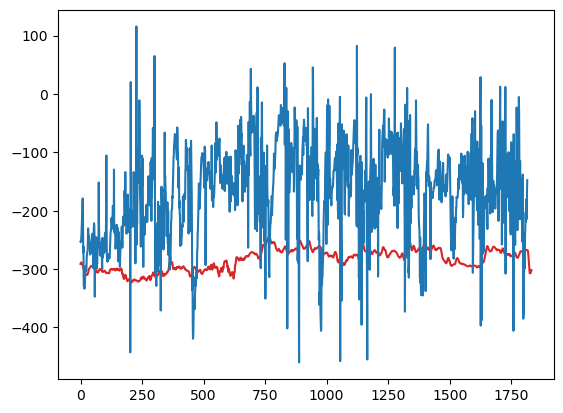

In [101]:
plt.plot(all_gabor_responses['field']['stationary_1'][0, 0, 0, 4, :], color='tab:red')
plt.plot(all_gabor_responses['field']['moving_1'][0, 0, 0, 4, :], color='tab:blue')

## Compute SD

### Only full frequency

In [ ]:
# low frequency multiple window sizes

import bottleneck as bn

environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

stationary_stim_SD = []
moving_stim_SD = []
stationary_stim = []
moving_stim = []

fps = 30
window_length = np.array([1, 2, 5, 10, 20]) # seconds
window_size = window_length * fps
print(window_size)
num_samples = 1740

# get the responses for each environment
for i in range(len(window_size)):
    stationary_stim_SD_temp = []
    moving_stim_SD_temp = []
    # stationary_stim_temp = []
    # moving_stim_temp = []
    for env_key in environments:
        all_gabor_responses_env = all_gabor_responses[env_key]
        print(all_gabor_responses_env.keys())
        for vid_key in all_gabor_responses_env.keys():
            # compute the moving SD
            resp_SD = bn.move_std(all_gabor_responses_env[vid_key][()], window=window_size[i], min_count=window_size[i], axis=-1)[:, :, low_spatial_freq_idx, :, :num_samples]
            if 'stationary' in vid_key:
                stationary_stim_SD_temp.append(resp_SD)
                # stationary_stim_temp.append(all_gabor_responses_env[vid_key][()])
            if 'moving' in vid_key and 'free_moving' not in vid_key:
                moving_stim_SD_temp.append(resp_SD)
                # moving_stim_temp.append(all_gabor_responses_env[vid_key][()])
    stationary_stim_SD.append(stationary_stim_SD_temp)
    moving_stim_SD.append(moving_stim_SD_temp)
    # stationary_stim.append(stationary_stim_temp)
    # moving_stim.append(moving_stim_temp)

[ 30  60 150 300 600]
<KeysViewHDF5 ['free_moving_1', 'free_moving_10', 'free_moving_2', 'free_moving_3', 'free_moving_4', 'free_moving_5', 'free_moving_6', 'free_moving_7', 'free_moving_8', 'free_moving_9', 'moving_1', 'moving_10', 'moving_2', 'moving_3', 'moving_4', 'moving_5', 'moving_6', 'moving_7', 'moving_8', 'moving_9', 'stationary_1', 'stationary_10', 'stationary_2', 'stationary_3', 'stationary_4', 'stationary_5', 'stationary_6', 'stationary_7', 'stationary_8', 'stationary_9']>
<KeysViewHDF5 ['free_moving_1', 'free_moving_10', 'free_moving_2', 'free_moving_3', 'free_moving_4', 'free_moving_5', 'free_moving_6', 'free_moving_7', 'free_moving_8', 'free_moving_9', 'moving_1', 'moving_10', 'moving_2', 'moving_3', 'moving_4', 'moving_5', 'moving_6', 'moving_7', 'moving_8', 'moving_9', 'stationary_1', 'stationary_10', 'stationary_2', 'stationary_3', 'stationary_4', 'stationary_5', 'stationary_6', 'stationary_7', 'stationary_8', 'stationary_9']>
<KeysViewHDF5 ['free_moving_1', 'free_mo

KeyboardInterrupt: 

In [6]:
# For low freq only

import bottleneck as bn
from joblib import Parallel, delayed
from tqdm import tqdm

environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

fps = 30
window_length = np.array([5]) # np.array([1, 2, 5, 10, 20]) # seconds
window_size = window_length * fps
num_samples = 1740

# Pre-load all data into memory for faster access
all_gabor_data = {}
for env_key in tqdm(environments, desc="Pre-loading environments"):
    env_data = {}
    for vid_key in tqdm(all_gabor_responses[env_key].keys(), desc=f"Loading {env_key}", leave=False):
        env_data[vid_key] = all_gabor_responses[env_key][vid_key][()]
    all_gabor_data[env_key] = env_data

def compute_sd_for_video(data, window, idx, num_samples):
    # data: shape (..., time)
    return bn.move_std(data, window=window, min_count=window, axis=-1)[:, :, idx, :, :num_samples]

stationary_stim_SD = []
moving_stim_SD = []

for i, win in enumerate(tqdm(window_size, desc="Window sizes")):
    stationary_stim_SD_temp = []
    moving_stim_SD_temp = []
    for env_key in tqdm(environments, desc="Environments", leave=False):
        env_data = all_gabor_data[env_key]
        vid_keys = list(env_data.keys())
        results = Parallel(n_jobs=-1)(
            delayed(compute_sd_for_video)(env_data[vid_key], win, low_spatial_freq_idx, num_samples)
            for vid_key in tqdm(vid_keys, desc=f"Processing {env_key}", leave=False)
        )
        for vid_key, resp_SD in zip(vid_keys, results):
            if 'stationary' in vid_key:
                stationary_stim_SD_temp.append(resp_SD)
            if 'moving' in vid_key and 'free_moving' not in vid_key:
                moving_stim_SD_temp.append(resp_SD)
    stationary_stim_SD.append(stationary_stim_SD_temp)
    moving_stim_SD.append(moving_stim_SD_temp)

Window sizes:   0%|          | 0/1 [00:00<?, ?it/s]











Window sizes: 100%|██████████| 1/1 [02:39<00:00, 159.48s/it]


In [102]:
# For all frequencies

import bottleneck as bn
from joblib import Parallel, delayed
from tqdm import tqdm

environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

fps = 30
window_length = np.array([5]) # np.array([1, 2, 5, 10, 20]) # seconds
window_size = window_length * fps
num_samples = 1740

# Pre-load all data into memory for faster access
all_gabor_data = {}
for env_key in tqdm(environments, desc="Pre-loading environments"):
    env_data = {}
    for vid_key in tqdm(all_gabor_responses[env_key].keys(), desc=f"Loading {env_key}", leave=False):
        env_data[vid_key] = all_gabor_responses[env_key][vid_key][()]
    all_gabor_data[env_key] = env_data

def compute_sd_for_video(data, window, num_samples):
    # data: shape (..., time)
    return bn.move_std(data, window=window, min_count=window, axis=-1)[:, :, :, :, :num_samples]

stationary_stim_SD = []
moving_stim_SD = []

for i, win in enumerate(tqdm(window_size, desc="Window sizes")):
    stationary_stim_SD_temp = []
    moving_stim_SD_temp = []
    for env_key in tqdm(environments, desc="Environments", leave=False):
        env_data = all_gabor_data[env_key]
        vid_keys = list(env_data.keys())
        results = Parallel(n_jobs=-1)(
            delayed(compute_sd_for_video)(env_data[vid_key], win, num_samples)
            for vid_key in tqdm(vid_keys, desc=f"Processing {env_key}", leave=False)
        )
        for vid_key, resp_SD in zip(vid_keys, results):
            if 'stationary' in vid_key:
                stationary_stim_SD_temp.append(resp_SD)
            if 'moving' in vid_key and 'free_moving' not in vid_key:
                moving_stim_SD_temp.append(resp_SD)
    stationary_stim_SD.append(stationary_stim_SD_temp)
    moving_stim_SD.append(moving_stim_SD_temp)

Environments:   0%|                                                                                                                                                                                                      | 0/5 [00:00<?, ?it/s]

Processing field:   0%|                                                                                                                                                                                                 | 0/30 [00:00<?, ?it/s]

Processing field:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 28/30 [00:19<00:01,  1.40it/s]

                                                                                                                                                                                                                                               
Environments:  20%|██████████████████

In [103]:
# make arrays
stationary_stim_SD = np.array(stationary_stim_SD)
moving_stim_SD = np.array(moving_stim_SD)

In [104]:
stationary_stim_SD.shape

(1, 50, 8, 4, 70, 9, 1740)

In [105]:
avg_stationary_stim_SD = np.nanmean(stationary_stim_SD, axis=(1,-1))
avg_moving_stim_SD = np.nanmean(moving_stim_SD, axis=(1, -1))
windowed_std_moving_responses = avg_moving_stim_SD
windowed_std_stationary_responses = avg_stationary_stim_SD

In [106]:
avg_stationary_stim_SD.shape

(1, 8, 4, 70, 9)

In [107]:
# compute the mean and std of the SD
mean_avg_stationary_stim_SD = np.nanmean(avg_stationary_stim_SD[0])
std_avg_stationary_stim_SD = np.nanstd(avg_stationary_stim_SD[0])
mean_avg_moving_stim_SD = np.nanmean(avg_moving_stim_SD[0])
std_avg_moving_stim_SD = np.nanstd(avg_moving_stim_SD[0])
# print the mean and std
print(f'Mean SD: {mean_avg_stationary_stim_SD} +-  {std_avg_stationary_stim_SD}')
print(f'Mean SD: {mean_avg_moving_stim_SD} +-  {std_avg_moving_stim_SD}')


Mean SD: 7.028128743944866 +-  7.923190829980659
Mean SD: 12.200418723411682 +-  18.387188104483855


([<matplotlib.axis.XTick at 0x7f1d64267770>,
 [Text(1, 0, 'Stationary'), Text(2, 0, 'Moving')])

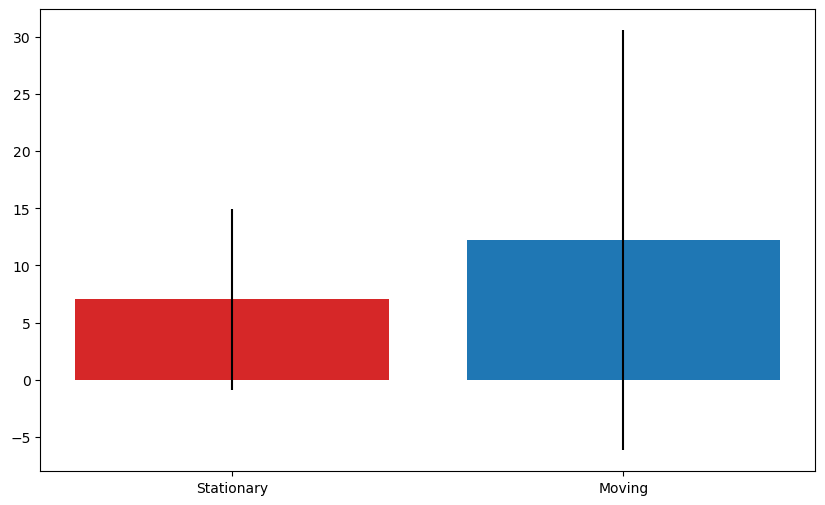

In [108]:
# plot this as bars
plt.figure(figsize=(10, 6))
plt.bar([1, 2], [mean_avg_stationary_stim_SD, mean_avg_moving_stim_SD], yerr=[std_avg_stationary_stim_SD, std_avg_moving_stim_SD], color=['tab:red', 'tab:blue'])
plt.xticks([1, 2], ['Stationary', 'Moving'])

## Gaussian optimization

In [109]:
# optimize nonlinearities using lookup table
dir_name = 'gaussian_optimization_analytic_fast' # 'test_gaussian_optimization_kraskov' # 'test_gaussian_optimization_fast_response_entropy' # 'redo_all_sigma_even_more_bins_optimized_zscored_data' # 'all_sigma_more_bins_zscored_data' # 'redo_all_sigma_less_bins_optimized_zscored_data' # 'redo_all_sigma_more_bins_optimized_zscored_data' # 'all_sigma_more_bins_optimized_zscored_data'  # 'higher_sigma_for_zscored_data' # 'more_sigma_bins_gaussian_results' # 'even_more_sigma_bins_gaussian_results'

MI_arr = np.load(dir_name + '/MI_arr.npy')
# stimulus_entropy = np.load(dir_name + '/stimulus_entropy.npy')
average_response_arr = np.load(dir_name + '/average_response_arr.npy')
stimulus_entropy = np.load(dir_name + '/stim_entropy_arr.npy')

# stimulus_bins = np.load(dir_name + '/stimulus_bins.npy') # np.linspace(-30, 30, 200)
response_bins = np.load(dir_name + '/response_bins.npy') #

# Define the range of k and L values for grid search
k_arr = np.load(dir_name + '/k_arr.npy') # np.logspace(-2, 2, num_bins) # 5*np.logspace(-2, 0, 100)
L_arr = np.load(dir_name + '/L_arr.npy') # np.arange(0.02, 4.02, .02) # np.arange(0.05, 5.05, .05)
sigma_arr = np.load(dir_name + '/sigma_arr.npy') # 5*np.logspace(-2, 1, num_bins) # np.logspace(-2, 2, num_bins)

# for each sigma compute the optimal parameters for a range of different lambdas
lambda_arr = np.arange(0, 10.5, .5)
optimal_k = np.zeros((len(sigma_arr), len(lambda_arr)))
optimal_L = np.zeros((len(sigma_arr), len(lambda_arr)))
optimal_k_idx = np.zeros((len(sigma_arr), len(lambda_arr)), dtype=np.int32)
optimal_L_idx = np.zeros((len(sigma_arr), len(lambda_arr)), dtype=np.int32)

for i, lambda_ in enumerate(lambda_arr):
    utility = MI_arr - lambda_ * average_response_arr # np.clip(MI_arr/stimulus_entropy[:, np.newaxis, np.newaxis], 0, 1) - lambda_ * average_response_arr
    print(utility.shape)
    # utility = gaussian_filter(utility, sigma=5, axes=(1, 2))
    for j, sigma in enumerate(sigma_arr):
        optimal_k_idx[j, i] = int(np.unravel_index(np.argmax(utility[j, :, :]), utility[j, :, :].shape)[0])
        optimal_L_idx[j, i] = int(np.unravel_index(np.argmax(utility[j, :, :]), utility[j, :, :].shape)[1])
        optimal_k[j, i] = k_arr[optimal_k_idx[j, i]]
        optimal_L[j, i] = L_arr[optimal_L_idx[j, i]]
        

(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)
(280, 200, 200)


In [110]:
# loop over all orientations and phases and wavelengths and compute the optimal parameters for each
optimal_k_arr_moving = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))
optimal_L_arr_moving = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))
optimal_k_arr_stationary = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))
optimal_L_arr_stationary = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), len(lambda_arr)))

for i, orientation in tqdm(enumerate(orientation_arr)):
    print("orientation: " + str(orientation))
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(wavelength_arr):
            for m, position in enumerate(position_arr):
                test_moving_std = windowed_std_moving_responses[0, i, j, l, m]
                test_stationary_std = windowed_std_stationary_responses[0, i, j, l, m]
                for n, lambda_ in enumerate(lambda_arr):
                    moving_idx = np.argmin(np.abs(sigma_arr - test_moving_std))
                    optimal_k_arr_moving[i, j, l, m, n] = optimal_k[moving_idx, n]
                    optimal_L_arr_moving[i, j, l, m, n] = optimal_L[moving_idx, n]
                    stationary_idx = np.argmin(np.abs(sigma_arr - test_stationary_std))
                    optimal_k_arr_stationary[i, j, l, m, n] = optimal_k[stationary_idx, n]
                    optimal_L_arr_stationary[i, j, l, m, n] = optimal_L[stationary_idx, n]


0it [00:00, ?it/s]

orientation: 0.0


1it [00:00,  1.19it/s]

orientation: 22.5


2it [00:01,  1.35it/s]

orientation: 45.0


3it [00:02,  1.19it/s]

orientation: 67.5


4it [00:03,  1.26it/s]

orientation: 90.0


5it [00:04,  1.21it/s]

orientation: 112.5


6it [00:04,  1.21it/s]

orientation: 135.0


7it [00:05,  1.18it/s]

orientation: 157.5


8it [00:06,  1.18it/s]


# Compute firing rates

8it [00:01,  5.46it/s]


Text(0.5, 1.0, 'Relative difference decreases with spatial frequency')

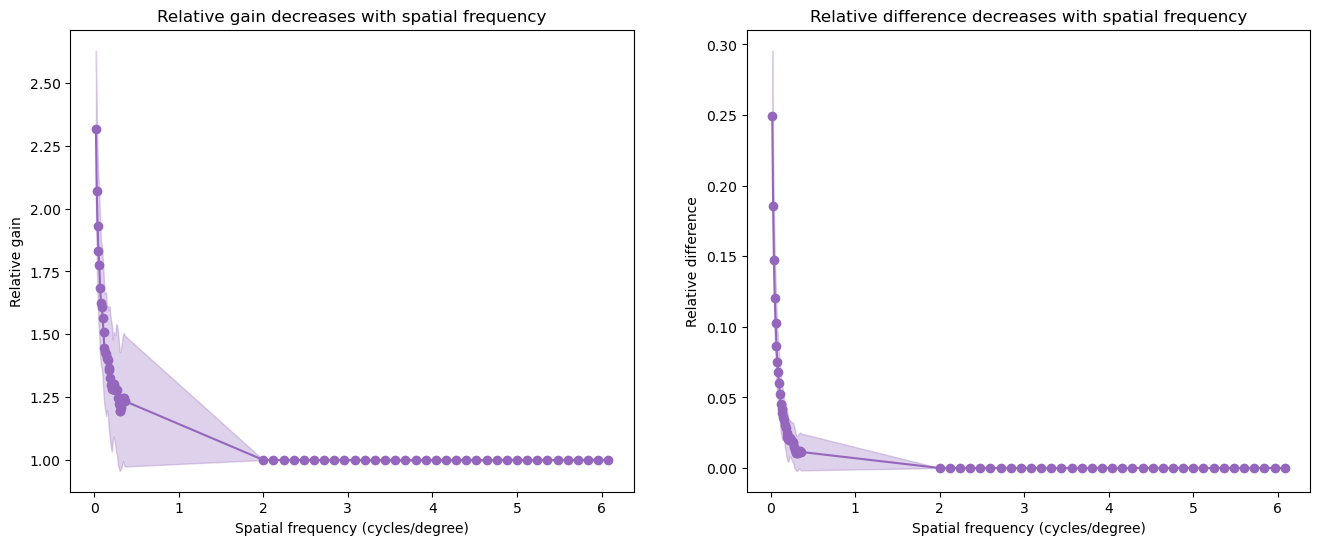

In [111]:
# compute the firing rate for the optimal parameters

lambda_idx = 2

sigma = 50
num_samples = int(1000)
threshold = 0

moving_firing_rates = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), num_samples))
stationary_firing_rates = np.zeros((len(orientation_arr), len(phase_arr), len(wavelength_arr), len(position_arr), num_samples))
stimulus = np.random.laplace(0, sigma, num_samples)
for i, orientation in tqdm(enumerate(orientation_arr)):
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(wavelength_arr):
            for m, position in enumerate(position_arr):
                    moving_firing_rates[i, j, l, m, :] = logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l, m, lambda_idx], L=optimal_L_arr_moving[i, j, l, m, lambda_idx])
                    stationary_firing_rates[i, j, l, m, :] = logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l, m, lambda_idx])

modulation = np.nanmean(moving_firing_rates, axis=-1) / np.nanmean(stationary_firing_rates, axis=-1)
avg_modulation = np.nanmean(modulation, axis=(0, 1, 3))
SD_modulation = np.nanstd(modulation, axis=(0, 1, 3))

diff_modulation = np.nanmean(moving_firing_rates, axis=-1) - np.nanmean(stationary_firing_rates, axis=-1)
avg_diff_modulation = np.nanmean(diff_modulation, axis=(0, 1, 3))
SD_diff_modulation = np.nanstd(diff_modulation, axis=(0, 1, 3))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(freq_arr, avg_modulation, 'o-', color='tab:purple')
ax[0].fill_between(freq_arr, avg_modulation - SD_modulation, avg_modulation + SD_modulation, color='tab:purple', alpha=0.3)
ax[0].set_xlabel('Spatial frequency (cycles/degree)')
ax[0].set_ylabel('Relative gain')
ax[0].set_title('Relative gain decreases with spatial frequency')

ax[1].plot(freq_arr, avg_diff_modulation, 'o-', color='tab:purple')
ax[1].fill_between(freq_arr, avg_diff_modulation - SD_diff_modulation, avg_diff_modulation + SD_diff_modulation, color='tab:purple', alpha=0.3)
ax[1].set_xlabel('Spatial frequency (cycles/degree)')
ax[1].set_ylabel('Relative difference')
ax[1].set_title('Relative difference decreases with spatial frequency')

## Interspecies comparison

In [264]:
# define the Gabor filter function
def gabor_filter(
    sigma, theta, gamma, wavelength, phase, filt_size, x_offset=0, y_offset=0
):
    y, x = np.meshgrid(
        np.arange(filt_size[1]) - filt_size[1] // 2,
        np.arange(filt_size[0]) - filt_size[0] // 2,
    )
    x = x - x_offset
    y = y + y_offset
    x_prime = x * np.cos(np.pi * theta / 180) + y * np.sin(np.pi * theta / 180)
    y_prime = -x * np.sin(np.pi * theta / 180) + y * np.cos(np.pi * theta / 180)
    filter = np.exp(-0.5 * (x_prime**2 + (gamma * y_prime) ** 2) / sigma**2) * np.cos(
        2 * np.pi * x_prime / wavelength + np.pi * phase / 180)
    filter /= np.linalg.norm(filter)
    return filter

In [265]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

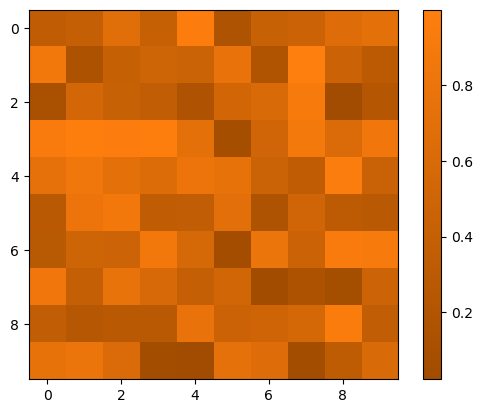

In [266]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
black_to_orange = LinearSegmentedColormap.from_list('black_to_orange', [
    (0, '#a14c00'),
    (1, 'tab:orange')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=black_to_orange)
fig.colorbar(cax)
plt.show()

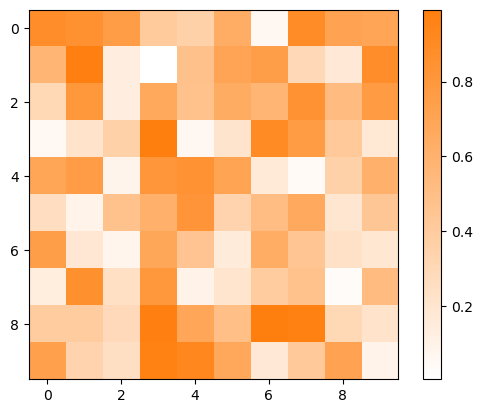

In [267]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_orange = LinearSegmentedColormap.from_list('white_to_orange', [
    (0, '#ffffff'),
    (1, 'tab:orange')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_orange)
fig.colorbar(cax)
plt.show()

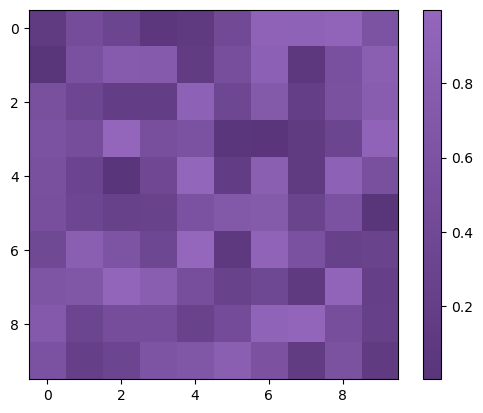

In [268]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
black_to_purple = LinearSegmentedColormap.from_list('white_to_purple', [
    (0, '#59357a'),
    (1, 'tab:purple')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=black_to_purple)
fig.colorbar(cax)
plt.show()

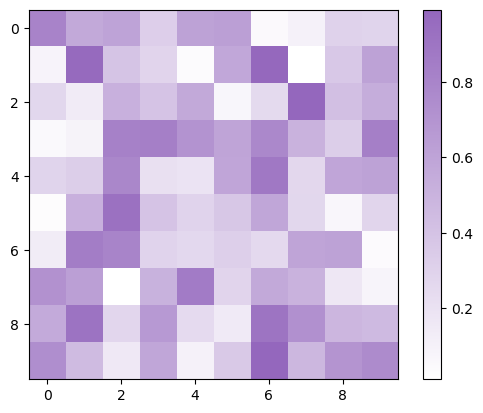

In [269]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_purple = LinearSegmentedColormap.from_list('white_to_purple', [
    (0, '#ffffff'),
    (1, 'tab:purple')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_purple)
fig.colorbar(cax)
plt.show()

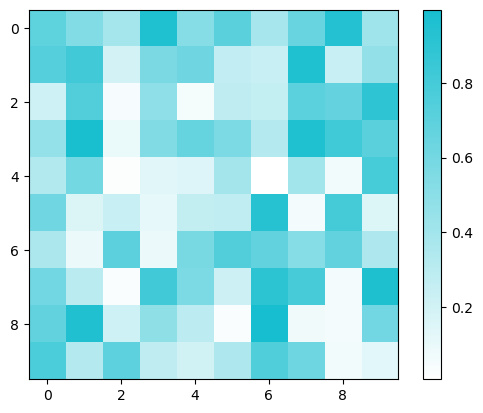

In [270]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_cyan = LinearSegmentedColormap.from_list('white_to_cyan', [
    (0, '#ffffff'),
    (1, 'tab:cyan')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_cyan)
fig.colorbar(cax)
plt.show()

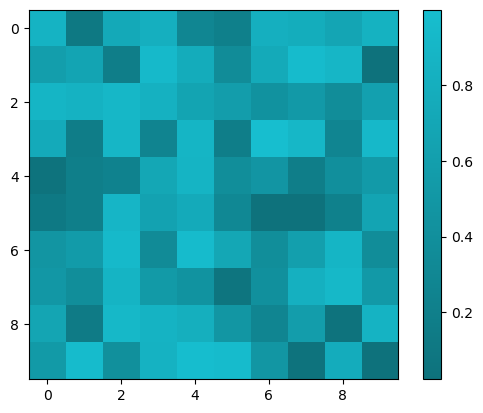

In [271]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
black_to_cyan = LinearSegmentedColormap.from_list('black_to_cyan', [
    (0, '#0e727c'),
    (1, 'tab:cyan')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=black_to_cyan)
fig.colorbar(cax)
plt.show()

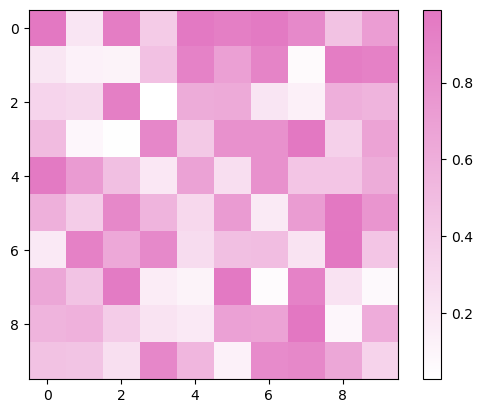

In [272]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_pink = LinearSegmentedColormap.from_list('white_to_pink', [
    (0, '#ffffff'),
    (1, 'tab:pink')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_pink)
fig.colorbar(cax)
plt.show()

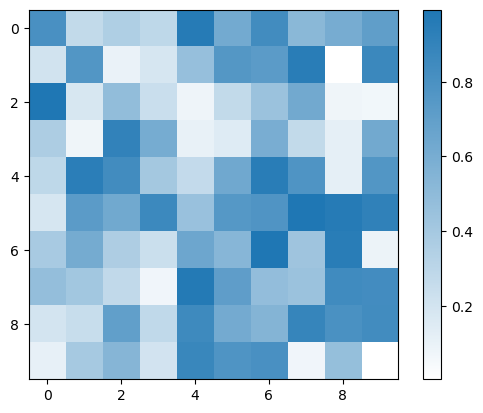

In [273]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_blue = LinearSegmentedColormap.from_list('white_to_blue', [
    (0, '#ffffff'),
    (1, 'tab:blue')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_blue)
fig.colorbar(cax)
plt.show()

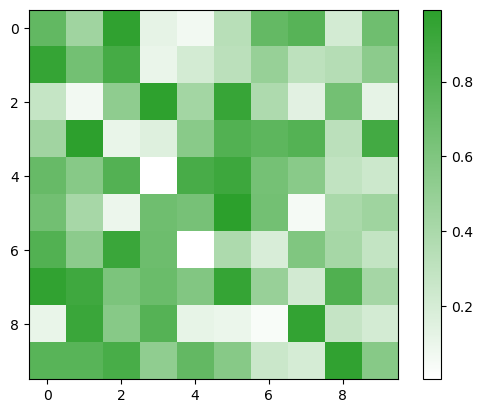

In [274]:
from matplotlib.colors import LinearSegmentedColormap

# Create a gradient colormap from white to tab:cyan
white_to_green = LinearSegmentedColormap.from_list('white_to_green', [
    (0, '#ffffff'),
    (1, 'tab:green')
], N=256)

# Example usage
fig, ax = plt.subplots()
data = np.random.rand(10, 10)
cax = ax.imshow(data, cmap=white_to_green)
fig.colorbar(cax)
plt.show()

## Mouse vs. Marmoset

In [ ]:
# load in the measured sf of mouse and marmoset
# load the mouse and marmoset spatial frequencies as a npy array
marm_data = np.load('../data/parker/marm_sf.npy')
mouse_data = np.load('../data/parker/mouse_sf.npy')

In [375]:
# remove the nan values
marm_data = marm_data[~np.isnan(marm_data)]
mouse_data = mouse_data[~np.isnan(mouse_data)]

In [376]:
print(np.nanmax(windowed_std_moving_responses[0, :, :, high_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_moving_responses[0, :, :, high_spatial_freq_idx, :]))
print(np.nanmax(windowed_std_stationary_responses[0, :, :, high_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_stationary_responses[0, :, :, high_spatial_freq_idx, :]))

1.9820969543407043
0.1687821286721867
1.7185801678867934
0.13659193728135688


In [377]:
print(np.nanmax(windowed_std_moving_responses[0, :, :, low_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_moving_responses[0, :, :, low_spatial_freq_idx, :]))
print(np.nanmax(windowed_std_stationary_responses[0, :, :, low_spatial_freq_idx, :]))
print(np.nanmin(windowed_std_stationary_responses[0, :, :, low_spatial_freq_idx, :]))

145.61080866218643
7.7456605028214565
39.71643403985445
4.758319619871142


In [378]:
low_freq_bin_centers = freq_arr[low_spatial_freq_idx] # freq_arr_low_freq # 
high_freq_bin_centers = freq_arr[high_spatial_freq_idx]

# create bins for the low and high spatial frequencies using the bin centers
low_freq_bins = [0]
low_freq_bin_diff = np.diff(low_freq_bin_centers)
for i in range(len(low_freq_bin_centers)-1):
    low_freq_bins.append(low_freq_bin_centers[i]+low_freq_bin_diff[i]/2)
low_freq_bins.append(10)

high_freq_bins = [0]
high_freq_bin_diff = np.diff(high_freq_bin_centers)
for i in range(len(high_freq_bin_centers)-1):
    high_freq_bins.append(high_freq_bin_centers[i]+high_freq_bin_diff[i]/2)
high_freq_bins.append(10)

In [379]:
# compute the probability of the low and high spatial frequencies
low_freq_prob = np.histogram(mouse_data, bins=low_freq_bins, weights=np.ones_like(mouse_data)/len(mouse_data))[0]
high_freq_prob = np.histogram(marm_data, bins=high_freq_bins, weights=np.ones_like(marm_data)/len(marm_data))[0]

In [380]:
np.max(mouse_data)

0.32000000000000023

(0.0, 0.5)

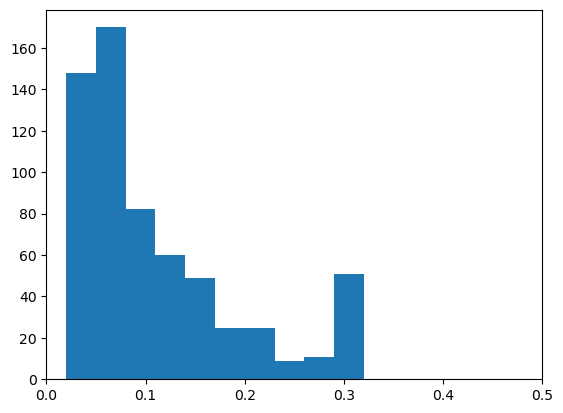

In [381]:
plt.hist(mouse_data)
plt.xlim(0, 0.5)

In [382]:
# take a weighted sum of the ratio of filter SD based on the distribution of spatial frequencies observed experimentally.
SD_ratio = windowed_std_moving_responses/windowed_std_stationary_responses
SD_ratio = SD_ratio[0]
# SD_ratio_avg_ori_phase_pos = np.mean(SD_ratio[0, :, :, :, :], axis=(0, 1, 3))
num_ori = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[0]
num_phases = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[1]
num_pos = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[3]

high_freq_weighting_arr = np.tile(high_freq_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))
low_freq_weighting_arr = np.tile(low_freq_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))

# normalize so all of the weights add up to 1
high_freq_weighting_arr /= np.sum(high_freq_weighting_arr)
low_freq_weighting_arr /= np.sum(low_freq_weighting_arr)

# from statsmodels.stats.weightstats import DescrStatsW
# low_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, low_spatial_freq_idx, :], weights=low_freq_weighting_arr).std
# high_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr).std
print(np.shape(SD_ratio))
print(np.shape(high_freq_weighting_arr))
avg_high_freq_SD_ratio = np.average(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr)
avg_low_freq_SD_ratio = np.average(SD_ratio[:, :, low_spatial_freq_idx, :], weights=low_freq_weighting_arr)

std_high_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, high_spatial_freq_idx, :]-avg_high_freq_SD_ratio)**2, weights=high_freq_weighting_arr))
std_low_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, low_spatial_freq_idx, :]-avg_low_freq_SD_ratio)**2, weights=low_freq_weighting_arr))


(8, 4, 70, 9)
(8, 4, 35, 9)


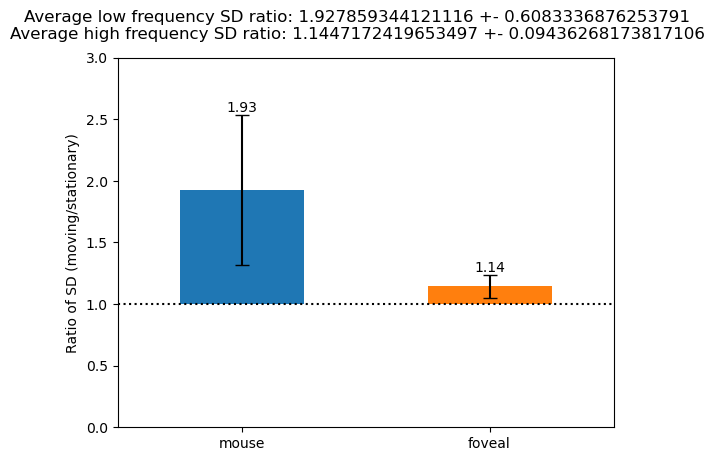

In [383]:
p = plt.bar([1, 2], [avg_low_freq_SD_ratio-1, avg_high_freq_SD_ratio-1], color=['tab:blue', 'tab:orange'], width=.5, yerr=[std_low_freq_SD_ratio, std_high_freq_SD_ratio], capsize=5, bottom=1)
plt.bar_label(p, [np.round(avg_low_freq_SD_ratio, 2), np.round(avg_high_freq_SD_ratio, 2)])
plt.ylim(0, 3)
plt.xlim(0.5, 2.5)
plt.axhline(1, color='k', linestyle=':')
plt.xticks([1, 2], ['mouse', 'foveal'])
plt.ylabel('Ratio of SD (moving/stationary)')
plt.suptitle(f'Average low frequency SD ratio: {avg_low_freq_SD_ratio} +- {std_low_freq_SD_ratio}\nAverage high frequency SD ratio: {avg_high_freq_SD_ratio} +- {std_high_freq_SD_ratio}')
plt.savefig('../manuscript_figures/fig5_SD_bars_mouse_foveal.pdf', format='pdf', bbox_inches='tight')

In [384]:
num_draws = int(2000)
lambda_idx = 2
num_samples_per_draw = int(1000)
sigma = 50

low_freq_stationary_firing_rates_full = []
low_freq_moving_firing_rates_full = []
high_freq_stationary_firing_rates_full = []
high_freq_moving_firing_rates_full = []
low_freq_stationary_k = []
low_freq_stationary_L = []
low_freq_moving_k = []
low_freq_moving_L = []
low_freq_ori_idx = []
low_freq_phase_idx = []
low_freq_wavelength_idx = []
low_freq_position_idx = []
high_freq_stationary_k = []
high_freq_stationary_L = []
high_freq_moving_k = []
high_freq_moving_L = []
high_freq_ori_idx = []
high_freq_phase_idx = []
high_freq_wavelength_idx = []
high_freq_position_idx = []

for draw_num in tqdm(range(num_draws)):
    # randomly choose a filter
    i = np.random.randint(0, len(orientation_arr))
    j = np.random.randint(0, len(phase_arr))
    l_low = np.random.choice(low_spatial_freq_idx, p=low_freq_prob) # np.random.choice(low_spatial_freq_idx, p=low_freq_prob)
    # l_low = np.random.choice(np.arange(len(freq_arr_low_freq)), p=low_freq_prob) # np.random.choice(low_spatial_freq_idx, p=low_freq_prob)
    l_high = np.random.choice(high_spatial_freq_idx, p=high_freq_prob)
    m = np.random.randint(0, len(position_arr))
    # compute firing rates
    # compute the firing rate for the optimal parameters
    stimulus = np.random.laplace(0, sigma, num_samples_per_draw)
    low_freq_stationary_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_low, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_low, m, lambda_idx]))
    low_freq_moving_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_low, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_low, m, lambda_idx]))
    high_freq_stationary_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_high, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_high, m, lambda_idx]))
    high_freq_moving_firing_rates_full.append(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_high, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_high, m, lambda_idx]))
    low_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_low, m, lambda_idx]) 
    low_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])
    low_freq_moving_k.append(optimal_k_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_moving_L.append(optimal_L_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_ori_idx.append(i)
    low_freq_phase_idx.append(j)
    low_freq_wavelength_idx.append(l_low)
    low_freq_position_idx.append(m)
    high_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_moving_k.append(optimal_k_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_moving_L.append(optimal_L_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_ori_idx.append(i)
    high_freq_phase_idx.append(j)
    high_freq_wavelength_idx.append(l_high)
    high_freq_position_idx.append(m)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2993.64it/s]


In [385]:

low_freq_stationary_firing_rates_full = np.array(low_freq_stationary_firing_rates_full)
low_freq_moving_firing_rates_full = np.array(low_freq_moving_firing_rates_full)
high_freq_stationary_firing_rates_full = np.array(high_freq_stationary_firing_rates_full)
high_freq_moving_firing_rates_full = np.array(high_freq_moving_firing_rates_full)
low_freq_stationary_firing_rates = np.mean(low_freq_stationary_firing_rates_full, axis=-1)
low_freq_moving_firing_rates = np.mean(low_freq_moving_firing_rates_full, axis=-1)
high_freq_stationary_firing_rates = np.mean(high_freq_stationary_firing_rates_full, axis=-1)
high_freq_moving_firing_rates = np.mean(high_freq_moving_firing_rates_full, axis=-1)
# remove any outliers from the firing rates if they are greater than 3 SD from the mean

# num_sigma = 3
# low_freq_stationary_firing_rates_outliers = np.where(np.abs(low_freq_stationary_firing_rates - np.mean(low_freq_stationary_firing_rates)) > num_sigma * np.std(low_freq_stationary_firing_rates))[0]
# low_freq_moving_firing_rates_outliers = np.where(np.abs(low_freq_moving_firing_rates - np.mean(low_freq_moving_firing_rates)) > num_sigma * np.std(low_freq_moving_firing_rates))[0]
# high_freq_stationary_firing_rates_outliers = np.where(np.abs(high_freq_stationary_firing_rates - np.mean(high_freq_stationary_firing_rates)) > num_sigma * np.std(high_freq_stationary_firing_rates))[0]
# high_freq_moving_firing_rates_outliers = np.where(np.abs(high_freq_moving_firing_rates - np.mean(high_freq_moving_firing_rates)) > num_sigma * np.std(high_freq_moving_firing_rates))[0]
# # merge the outliers for the stationary and moving
# low_freq_stationary_firing_rates_outliers = np.concatenate((low_freq_stationary_firing_rates_outliers, low_freq_moving_firing_rates_outliers))
# # ensure no repeats
# low_freq_stationary_firing_rates_outliers = np.unique(low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates_outliers = np.concatenate((high_freq_stationary_firing_rates_outliers, high_freq_moving_firing_rates_outliers))
# # ensure no repeats
# high_freq_stationary_firing_rates_outliers = np.unique(high_freq_stationary_firing_rates_outliers)
# # remove the outliers from the firing rates
# low_freq_stationary_firing_rates = np.delete(low_freq_stationary_firing_rates, low_freq_stationary_firing_rates_outliers)
# low_freq_moving_firing_rates = np.delete(low_freq_moving_firing_rates, low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates = np.delete(high_freq_stationary_firing_rates, high_freq_stationary_firing_rates_outliers)
# high_freq_moving_firing_rates = np.delete(high_freq_moving_firing_rates, high_freq_stationary_firing_rates_outliers)


In [386]:
low_freq_stationary_sorted.shape

(2000,)

1 100
Number of low frequency points not shown in the plot: 1


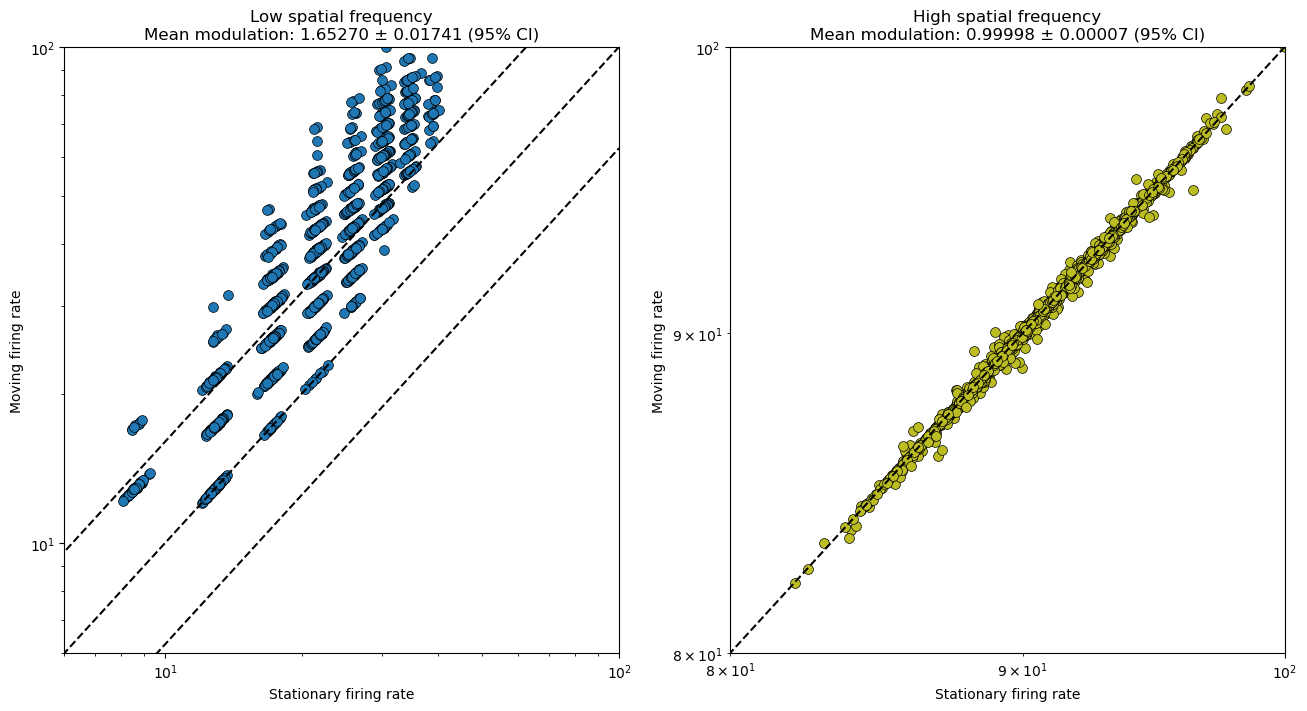

In [387]:
from scipy.stats import gaussian_kde

jitter_sigma = 0

cm = 1/2.54

fig = plt.figure(figsize=(40*cm, 20*cm))

# low_freq_norm = np.max([np.max(avg_stationary_firing_rates[:, :, low_spatial_freq_idx, :].flatten()), np.max(avg_moving_firing_rates[:, :, low_spatial_freq_idx, :].flatten())])

# subtract the minimum firing rate from the firing rates
# low_freq_min_val = np.nanmin(np.concatenate((low_freq_stationary_firing_rates, low_freq_moving_firing_rates)))
# normed_low_freq_stationary_firing_rates = low_freq_stationary_firing_rates - low_freq_min_val
# normed_low_freq_moving_firing_rates = low_freq_moving_firing_rates - low_freq_min_val

low_freq_norm = np.max(np.concatenate((low_freq_stationary_firing_rates, low_freq_moving_firing_rates)))

normed_low_freq_stationary_firing_rates = 100*low_freq_stationary_firing_rates/low_freq_norm
normed_low_freq_moving_firing_rates = 100*low_freq_moving_firing_rates/low_freq_norm

# multiply by 0.9 and add 0.1
# normed_low_freq_stationary_firing_rates *= 0.5
# normed_low_freq_moving_firing_rates *= 0.5
# normed_low_freq_stationary_firing_rates += 0.5
# normed_low_freq_moving_firing_rates += 0.5

# xy = np.vstack([normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates])
# z = gaussian_kde(xy)(xy)

# add jitter
normed_low_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_stationary_firing_rates))
normed_low_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_moving_firing_rates))

# renormalize
# low_freq_min_val = np.nanmin(np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates)))

# normed_low_freq_stationary_firing_rates -= low_freq_min_val
# normed_low_freq_moving_firing_rates -= low_freq_min_val

# low_freq_norm = np.max(np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates)))

# normed_low_freq_stationary_firing_rates = normed_low_freq_stationary_firing_rates/low_freq_norm
# normed_low_freq_moving_firing_rates = normed_low_freq_moving_firing_rates/low_freq_norm

# multiply by 0.9 and add 0.1
# normed_low_freq_stationary_firing_rates *= 0.5
# normed_low_freq_moving_firing_rates *= 0.5
# normed_low_freq_stationary_firing_rates += 0.5
# normed_low_freq_moving_firing_rates += 0.5

# low_freq_staitonary_sorted = np.argsort(normed_low_freq_stationary_firing_rates.flatten())
# low_freq_moving_sorted_idx = np.argsort(z)

# low_freq_stationary_sorted = normed_low_freq_stationary_firing_rates[low_freq_moving_sorted_idx]
# low_freq_moving_sorted = normed_low_freq_moving_firing_rates[low_freq_moving_sorted_idx]
# z = z[low_freq_moving_sorted_idx]

ax = fig.add_subplot(1, 2, 1)
# density = ax.scatter(low_freq_stationary_sorted, low_freq_moving_sorted, s=50, edgecolors='#000000', linewidths=0.5, c=z, cmap=white_to_purple)
density = ax.scatter(normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates, s=50, edgecolors='#000000', linewidths=0.5)

# add a colorbar for the density plot
# colorbar(density)

# subtract the minimum firing rate from the firing rates
# high_freq_min_val = np.nanmin(np.concatenate((high_freq_stationary_firing_rates, high_freq_moving_firing_rates)))
# normed_high_freq_stationary_firing_rates = high_freq_stationary_firing_rates - high_freq_min_val
# normed_high_freq_moving_firing_rates = high_freq_moving_firing_rates - high_freq_min_val

high_freq_norm = np.max(np.concatenate((high_freq_stationary_firing_rates, high_freq_moving_firing_rates)))

normed_high_freq_stationary_firing_rates = 100*high_freq_stationary_firing_rates/high_freq_norm
normed_high_freq_moving_firing_rates = 100*high_freq_moving_firing_rates/high_freq_norm

# normed_high_freq_stationary_firing_rates *= 0.5
# normed_high_freq_moving_firing_rates *= 0.5
# normed_high_freq_stationary_firing_rates += 0.5
# normed_high_freq_moving_firing_rates += 0.5

# xy = np.vstack([normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten()])
# z = gaussian_kde(xy)(xy)
normed_high_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_stationary_firing_rates))
normed_high_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_moving_firing_rates))

# renormalize
# high_freq_min_val = np.nanmin(np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates)))

# normed_high_freq_stationary_firing_rates -= high_freq_min_val
# normed_high_freq_moving_firing_rates -= high_freq_min_val

# high_freq_norm = np.max(np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates)))

# normed_high_freq_stationary_firing_rates = normed_high_freq_stationary_firing_rates/high_freq_norm
# normed_high_freq_moving_firing_rates = normed_high_freq_moving_firing_rates/high_freq_norm

# multiply by 0.9 and add 0.1
# normed_high_freq_stationary_firing_rates *= 0.5
# normed_high_freq_moving_firing_rates *= 0.5
# normed_high_freq_stationary_firing_rates += 0.5
# normed_high_freq_moving_firing_rates += 0.5

# high_freq_moving_sorted_idx = np.argsort(z)
# high_freq_stationary_sorted = normed_high_freq_stationary_firing_rates[high_freq_moving_sorted_idx]
# high_freq_moving_sorted = normed_high_freq_moving_firing_rates[high_freq_moving_sorted_idx]
# z = z[high_freq_moving_sorted_idx]

ax2 = fig.add_subplot(1, 2, 2)
# density2 = ax2.scatter(normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten(), s=50, edgecolors='#999999', linewidths=0.5, c=z, cmap=black_to_orange)
# density2 = ax2.scatter(high_freq_stationary_sorted, high_freq_moving_sorted, s=50, edgecolors='#000000', linewidths=0.5, c=z, cmap=white_to_orange)
density2 = ax2.scatter(normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates, s=50, edgecolors='#000000', linewidths=0.5, color='tab:olive')

# add a colorbar for the density plot
# colorbar(density2)

low_modulation = low_freq_moving_firing_rates / low_freq_stationary_firing_rates
high_modulation = high_freq_moving_firing_rates / high_freq_stationary_firing_rates

low_mean = np.nanmean(low_modulation)
low_sem = np.nanstd(low_modulation) / np.sqrt(np.sum(~np.isnan(low_modulation)))
low_ci = 1.96 * low_sem

high_mean = np.nanmean(high_modulation)
high_sem = np.nanstd(high_modulation) / np.sqrt(np.sum(~np.isnan(high_modulation)))
high_ci = 1.96 * high_sem

ax.set_xlabel('Stationary firing rate')
ax.set_ylabel('Moving firing rate')
ax.set_title(f'Low spatial frequency\nMean modulation: {low_mean:.5f} ± {low_ci:.5f} (95% CI)')
ax2.set_xlabel('Stationary firing rate')
ax2.set_ylabel('Moving firing rate')
ax2.set_title(f'High spatial frequency\nMean modulation: {high_mean:.5f} ± {high_ci:.5f} (95% CI)')
# ...existing code...

ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
# find the min and max y and x values
min_x = ax.get_xlim()[0]
max_x = ax.get_xlim()[1]
min_y = ax.get_ylim()[0]
max_y = ax.get_ylim()[1]
min_both = 1 # min(min_x, min_y)
max_both = 100 # max(max_x, max_y)
low_freq_lower_bound = 6
print(min_both, max_both)
ax.set_ylim(low_freq_lower_bound, 100)
ax.set_xlim(low_freq_lower_bound, 100)
ax2.set_ylim(80, 100)
ax2.set_xlim(80, 100)
# min_x2 = ax2.get_xlim()[0]
# max_x2 = ax2.get_xlim()[1]
# min_y2 = ax2.get_ylim()[0]
# max_y2 = ax2.get_ylim()[1]
# min_both2 = min(min_x2, min_y2)
# max_both2 = max(max_x2, max_y2)
# min_both2 = .7
# max_both2 = 1
# ax2.set_ylim(min_both2, max_both2)
# ax2.set_xlim(min_both2, max_both2)

# line = np.linspace(min(min_both, min_both2), max(max_both, max_both2), 100)
line = np.linspace(min_both, max_both, 100)
ax.plot(line, line, color='k', linestyle='--')
ax.plot(line, 1.6*line, color='k', linestyle='--')
ax.plot(line, line/1.6, color='k', linestyle='--')
ax2.plot(line, line, color='k', linestyle='--')
ax2.plot(line, 2*line, color='k', linestyle='--')
ax2.plot(line, line/2, color='k', linestyle='--')

# print how points are truncated
print(f'Number of low frequency points not shown in the plot: {np.sum(normed_low_freq_stationary_firing_rates<=low_freq_lower_bound)+np.sum(normed_low_freq_moving_firing_rates>=100)}')

plt.savefig('../manuscript_figures/fig5_mouse_marm_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('../cosyne_2025_figures/mouse_marm_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

In [388]:
high_bins

array([0.99009901, 0.99141346, 0.99272965, 0.99404759, 0.99536728,
       0.99668872, 0.99801191, 0.99933686, 1.00066358, 1.00199205,
       1.00332228, 1.00465429, 1.00598806, 1.0073236 , 1.00866091,
       1.01      ])

In [389]:
high_modulation.max()

1.0129011579847702

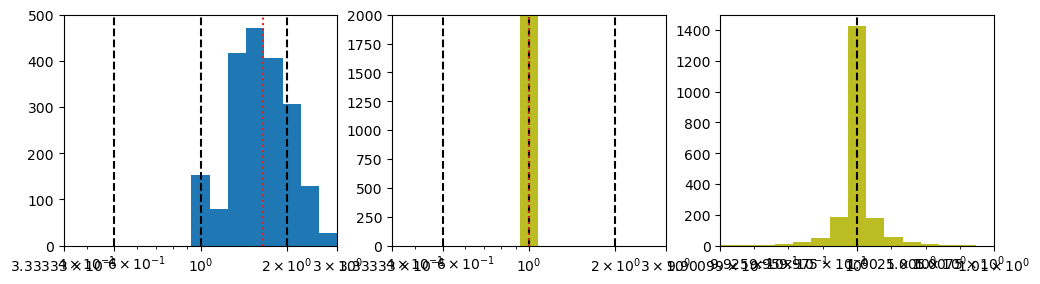

In [390]:
low_max = 3
high_max = 1.01

low_bins = np.logspace(np.log10(1/low_max), np.log10(low_max), 16)
high_bins = np.logspace(np.log10(1/high_max), np.log10(high_max), 16)

fig, ax = plt.subplots(1, 3, figsize=(12,3))

ax[0].hist(low_modulation, bins=low_bins, color='tab:blue')
ax[1].hist(high_modulation, bins=low_bins, color='tab:olive')
ax[2].hist(high_modulation, bins=high_bins, color='tab:olive')
ax[0].axvline(0.5, color='k', linestyle='--')
ax[0].axvline(1, color='k', linestyle='--')
ax[0].axvline(2, color='k', linestyle='--')
ax[1].axvline(0.5, color='k', linestyle='--')
ax[1].axvline(1, color='k', linestyle='--')
ax[1].axvline(2, color='k', linestyle='--')
ax[2].axvline(1, color='k', linestyle='--')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_xlim(1/low_max, low_max)
ax[1].set_xlim(1/low_max, low_max)
ax[2].set_xlim(1/high_max, high_max)
ax[0].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[1].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[2].set_xticks([1/high_max, 1, high_max])
ax[0].axvline(np.nanmean(low_modulation), color='tab:red', linestyle=':')
ax[1].axvline(np.nanmean(high_modulation), color='tab:red', linestyle=':')
ax[0].set_ylim(0, 500)
ax[1].set_ylim(0, 2000)
ax[2].set_ylim(0, 1500)
plt.savefig('../manuscript_figures/fig5_mouse_marm_dist_fr_ratio.pdf', format='pdf', bbox_inches='tight')

In [394]:
print(np.nanmean(low_modulation))

1.6526999286367323


/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100000 reached. Increase it to improve convergence.
  warnings.warn(
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 100000 reached. Increase it to improve convergence.
  warnings.warn(


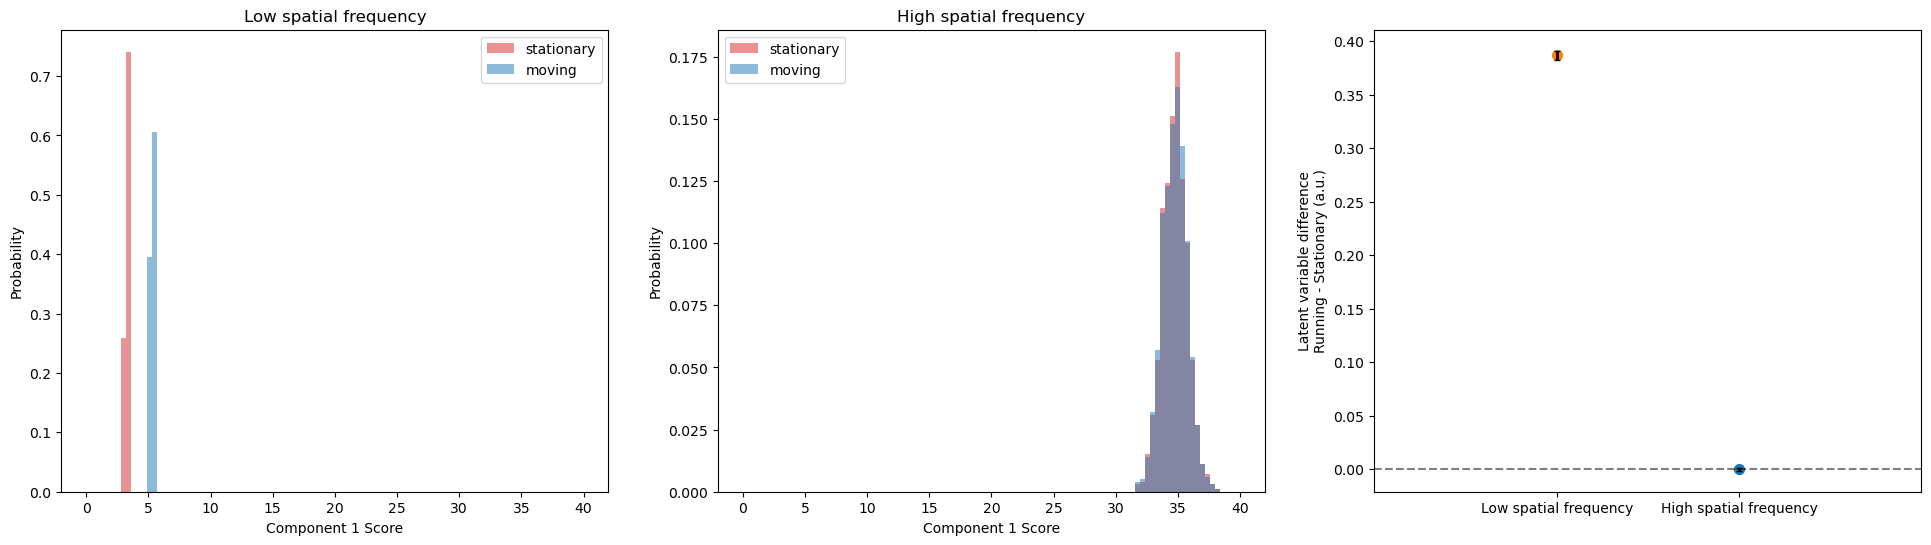

In [373]:
# dim reduction

low_freq_stationary_firing_rates_full = np.array(low_freq_stationary_firing_rates_full)
low_freq_moving_firing_rates_full = np.array(low_freq_moving_firing_rates_full)
high_freq_stationary_firing_rates_full = np.array(high_freq_stationary_firing_rates_full)
high_freq_moving_firing_rates_full = np.array(high_freq_moving_firing_rates_full)

# PCA on the optimal L and optimal k parameters
low_spatial_freq_design_mat = np.concatenate((low_freq_stationary_firing_rates_full, low_freq_moving_firing_rates_full), axis=-1).reshape(-1, 2*num_samples_per_draw).T
high_spatial_freq_design_mat = np.concatenate((high_freq_stationary_firing_rates_full, high_freq_moving_firing_rates_full), axis=-1).reshape(-1, 2*num_samples_per_draw).T

# normalize
low_spatial_freq_design_mat /= np.mean(low_spatial_freq_design_mat, axis=0, keepdims=True)
high_spatial_freq_design_mat /= np.mean(high_spatial_freq_design_mat, axis=0, keepdims=True)

from sklearn.decomposition import NMF

low_spatial_freq_nmf = NMF(n_components=1, max_iter=100000)
low_spatial_freq_nmf.fit(low_spatial_freq_design_mat)

high_spatial_freq_nmf = NMF(n_components=1, max_iter=100000)
high_spatial_freq_nmf.fit(high_spatial_freq_design_mat)

low_spatial_freq_nmf_scores = low_spatial_freq_nmf.transform(low_spatial_freq_design_mat)
high_spatial_freq_nmf_scores = high_spatial_freq_nmf.transform(high_spatial_freq_design_mat)

# compute the variance explained by the NMF using scipy metrics
from sklearn.metrics import explained_variance_score
def get_score(model, data, scorer=explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

low_spatial_freq_nmf_score = get_score(low_spatial_freq_nmf, low_spatial_freq_design_mat)
high_spatial_freq_nmf_score = get_score(high_spatial_freq_nmf, high_spatial_freq_design_mat)

component_idx = 0

bins = np.linspace(0, 40, 100)
n_draws = num_samples

low_diff = low_spatial_freq_nmf_scores[n_draws:, component_idx] - low_spatial_freq_nmf_scores[:n_draws, component_idx]
high_diff = high_spatial_freq_nmf_scores[n_draws:, component_idx] - high_spatial_freq_nmf_scores[:n_draws, component_idx]

# low_diff /= np.std(low_spatial_freq_nmf_scores[:, component_idx])
# high_diff /= np.std(high_spatial_freq_nmf_scores[:, component_idx])

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].hist(low_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(low_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx])/len(low_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]))
ax[0].hist(low_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(low_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx])/len(low_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]))
ax[0].set_xlabel(f'Component {component_idx+1} Score')
ax[0].set_ylabel('Probability')
ax[0].set_title('Low spatial frequency')
ax[0].legend()
ax[1].hist(high_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(high_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx])/len(high_spatial_freq_nmf_scores[:num_samples_per_draw, component_idx]))
ax[1].hist(high_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(high_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx])/len(high_spatial_freq_nmf_scores[num_samples_per_draw:, component_idx]))
ax[1].set_xlabel(f'Component {component_idx+1} Score')
ax[1].set_ylabel('Probability')
ax[1].set_title('High spatial frequency')
ax[1].legend()

ax[2].scatter(1, np.mean(low_diff), color='tab:orange', label='Low spatial frequency', s=50)
ax[2].scatter(2, np.mean(high_diff), color='tab:blue', label='High spatial frequency', s=50)
ax[2].errorbar(1, np.mean(low_diff), yerr=np.std(low_diff), color='k', linewidth=2, capsize=2)
ax[2].errorbar(2, np.mean(high_diff), yerr=np.std(high_diff), color='k', linewidth=2, capsize=2)
ax[2].set_xticks([1, 2])
ax[2].set_xticklabels(['Low spatial frequency', 'High spatial frequency'])
ax[2].set_xlim(0, 3)
ax[2].hlines(0, 0, 3, color='k', linestyle='--', alpha=0.5)
ax[2].set_ylabel('Latent variable difference\nRunning - Stationary (a.u.)')
# plt.savefig('../cosyne_2025_figures/nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../manuscript_figures/fig5_nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')

In [341]:
low_freq_stationary_firing_rates_full.flatten()[:, np.newaxis]

array([[9.88660102e-02],
       [9.18276499e-05],
       [8.60636100e-02],
       ...,
       [8.50166723e-02],
       [1.99740278e-01],
       [7.18048730e-02]])

In [354]:
# dim reduction

low_freq_stationary_firing_rates_full = np.array(low_freq_stationary_firing_rates_full)
low_freq_moving_firing_rates_full = np.array(low_freq_moving_firing_rates_full)
high_freq_stationary_firing_rates_full = np.array(high_freq_stationary_firing_rates_full)
high_freq_moving_firing_rates_full = np.array(high_freq_moving_firing_rates_full)

# regress the moving rates from the stationary responses to the same stimuli
from sklearn.linear_model import LinearRegression

low_freq_stationary_firing_rates_full_reshape = low_freq_stationary_firing_rates_full.flatten()[:, np.newaxis]
low_freq_moving_firing_rates_full_reshape = low_freq_moving_firing_rates_full.flatten()[:, np.newaxis]
high_freq_stationary_firing_rates_full_reshape = high_freq_stationary_firing_rates_full.flatten()[:, np.newaxis]
high_freq_moving_firing_rates_full_reshape = high_freq_moving_firing_rates_full.flatten()[:, np.newaxis]

low_reg = LinearRegression(fit_intercept=False).fit(low_freq_stationary_firing_rates_full_reshape, low_freq_moving_firing_rates_full_reshape)
high_reg = LinearRegression(fit_intercept=False).fit(high_freq_stationary_firing_rates_full_reshape, high_freq_moving_firing_rates_full_reshape)

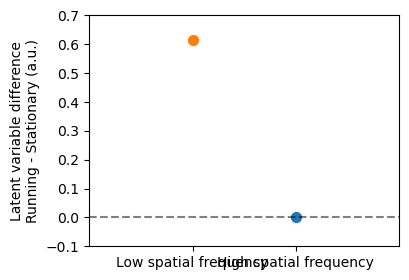

In [360]:
low_latent_diff = low_reg.coef_[0, 0] - 1
high_latent_diff = high_reg.coef_[0, 0] - 1

fig, ax = plt.subplots(1, 1, figsize=(4,3))

ax.scatter(1, low_latent_diff, color='tab:orange', label='Low spatial frequency', s=50)
ax.scatter(2, high_latent_diff, color='tab:blue', label='High spatial frequency', s=50)
# ax.errorbar(1, np.mean(low_diff), yerr=np.std(low_diff), color='k', linewidth=2, capsize=2)
# ax.errorbar(2, np.mean(high_diff), yerr=np.std(high_diff), color='k', linewidth=2, capsize=2)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Low spatial frequency', 'High spatial frequency'])
ax.set_xlim(0, 3)
ax.set_ylim(-0.1, 0.7)
ax.hlines(0, 0, 3, color='k', linestyle='--', alpha=0.5)
ax.set_ylabel('Latent variable difference\nRunning - Stationary (a.u.)')
plt.savefig('../manuscript_figures/fig5_latent_variable_difference.pdf', format='pdf', bbox_inches='tight')

In [391]:
# print the R^2 of the model
low_reg.score(low_freq_stationary_firing_rates_full_reshape, low_freq_moving_firing_rates_full_reshape)

0.7935715397105702

In [393]:
high_reg.score(high_freq_stationary_firing_rates_full_reshape, high_freq_moving_firing_rates_full_reshape)

0.9967295010791221

## Marmoset periphery vs. foveal

In [361]:
import matplotlib.pyplot as plt

spatial_freq_marm_perif = [0.01681792830507431, 0.023937280522921815, 0.03385242676184536, 0.04756828460010888, 0.0681407826741857, 0.09513656920021774, 0.13540970704738148, 0.1914982441833745, 0.2708194140947629, 0.38299648836674904]
probability_marm_perif = [1.216317365269461, 1.2838212463960978, 4.464958970946995, 11.358532934131738, 17.65372033710357, 24.487275449101794, 19.524839210467952, 17.017354180527832, 2.5937014859170517, 0.7448990907074737]


In [362]:
marm_data

array([3.40483721, 4.32451514, 2.71762289, 2.7410983 , 2.17117972,
       2.93639498, 2.18395694, 3.54694943, 3.22351801, 2.07024565,
       3.56599291, 2.00000363, 3.04092467, 5.04961054, 3.0283968 ,
       3.39480448, 2.51179145, 2.69900414, 2.87999767, 2.24211643,
       2.79935093, 2.40397428, 5.324218  , 6.11139976, 3.69361514,
       2.65649434, 3.04857653, 5.07706134, 2.26686698, 3.72387434,
       3.8973032 , 3.19101459, 3.62496332, 5.0421056 , 2.91993702,
       4.38610001, 3.27941472, 3.57083031, 2.22776566, 2.34491309,
       2.54783048, 3.2261482 , 2.68212288, 2.61156585, 5.02779559,
       2.60686763, 3.38488594, 3.70643192, 3.82948494, 2.99068918,
       2.32526684, 2.15100454, 2.        , 2.62858525, 2.55625867,
       3.62635186, 2.88882038, 3.57658413, 3.62675407, 2.33333894,
       2.63386252, 2.11980956, 3.42787241, 3.15937435, 3.31015939,
       4.17393576, 2.63388128, 9.54585913, 2.49353282, 2.74433732,
       5.68628048, 4.01057154, 2.30062633, 3.76429811, 3.74077

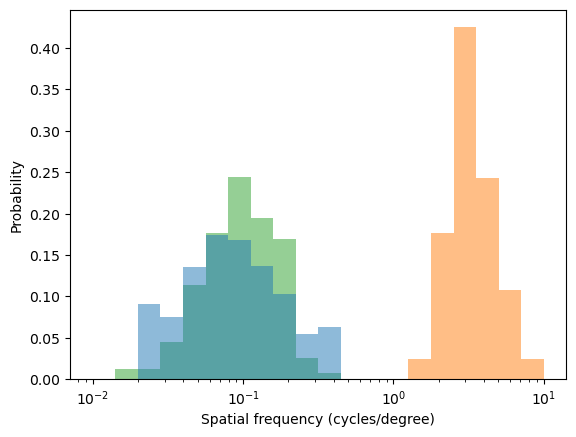

In [363]:
import numpy as np

# find a logspace bin edges whose midpoints match spatial_freq_marm_perif
bins = np.logspace(-2, 1, 21)
# plot histogram of the marmoset perifoveal data
plt.hist(spatial_freq_marm_perif, bins=bins, weights=probability_marm_perif/np.sum(probability_marm_perif), color='tab:green', alpha=0.5)
plt.hist(mouse_data, bins=bins, weights=np.ones_like(mouse_data)/len(mouse_data), color='tab:blue', alpha=0.5)
plt.hist(marm_data, bins=bins, weights=np.ones_like(marm_data)/len(marm_data), color='tab:orange', alpha=0.5)
plt.ylabel('Probability')
plt.xlabel('Spatial frequency (cycles/degree)')
plt.xscale('log')
# plt.xlim(.01, 1)
# plt.ylim(0, .3)
plt.savefig('../manuscript_figures/fig5_mouse_marmoset_perifoveal_spatial_freq.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 0, 'Spatial frequency (cycles/degree)')

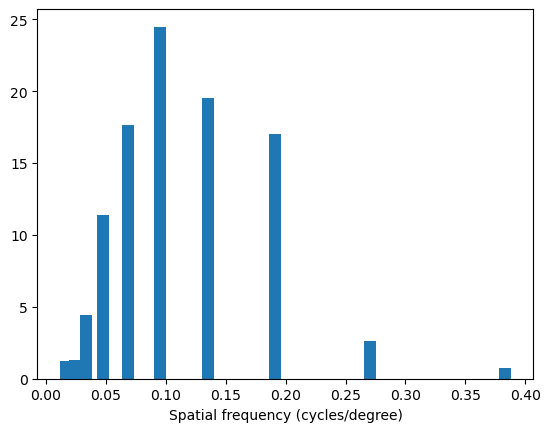

In [364]:
plt.bar(spatial_freq_marm_perif, probability_marm_perif, width=0.01)
plt.xlabel('Spatial frequency (cycles/degree)')
# plt.xscale('log')

In [365]:
print(freq_arr)
print(spatial_freq_marm_perif)
# find the index in freq_arr which is closest to the marmoset spatial frequencies
marm_idx = []
for i in range(len(spatial_freq_marm_perif)):
    marm_idx.append(np.argmin(np.abs(freq_arr - spatial_freq_marm_perif[i])))
print(marm_idx)
probability_marm_perif /= np.sum(probability_marm_perif)
print(probability_marm_perif)
# use the marm_idx to compute the probability for a given spatial frequency in freq_arr
marm_perif_prob = np.zeros_like(freq_arr)
for i in range(len(marm_idx)):
    marm_perif_prob[marm_idx[i]] += probability_marm_perif[i]


[0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 0.3  0.31 0.32 0.33 0.34 0.35 0.36 2.   2.12 2.24 2.36 2.48 2.6  2.72
 2.84 2.96 3.08 3.2  3.32 3.44 3.56 3.68 3.8  3.92 4.04 4.16 4.28 4.4
 4.52 4.64 4.76 4.88 5.   5.12 5.24 5.36 5.48 5.6  5.72 5.84 5.96 6.08]
[0.01681792830507431, 0.023937280522921815, 0.03385242676184536, 0.04756828460010888, 0.0681407826741857, 0.09513656920021774, 0.13540970704738148, 0.1914982441833745, 0.2708194140947629, 0.38299648836674904]
[0, 0, 1, 3, 5, 8, 12, 17, 25, 34]
[0.0121213  0.01279402 0.04449589 0.11319433 0.17592951 0.24402983
 0.19457629 0.16958775 0.02584773 0.00742335]


(8, 4, 70, 9)
(8, 4, 35, 9)


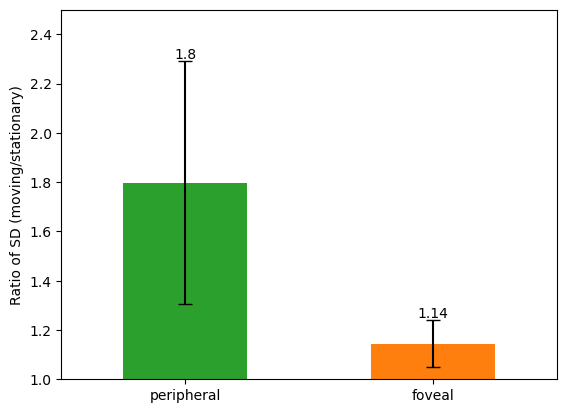

In [366]:
# take a weighted sum of the ratio of filter SD based on the distribution of spatial frequencies observed experimentally.
SD_ratio = windowed_std_moving_responses/windowed_std_stationary_responses
SD_ratio = SD_ratio[0]
# SD_ratio_avg_ori_phase_pos = np.mean(SD_ratio[0, :, :, :, :], axis=(0, 1, 3))
num_ori = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[0]
num_phases = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[1]
num_pos = np.shape(SD_ratio[:, :, low_spatial_freq_idx, :])[3]

high_freq_weighting_arr = np.tile(high_freq_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))
low_freq_weighting_arr = np.tile(marm_perif_prob[np.newaxis, np.newaxis, :, np.newaxis], (num_ori, num_phases, 1, num_pos))

# normalize so all of the weights add up to 1
high_freq_weighting_arr /= np.sum(high_freq_weighting_arr)
low_freq_weighting_arr /= np.sum(low_freq_weighting_arr)

# from statsmodels.stats.weightstats import DescrStatsW
# low_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, low_spatial_freq_idx, :], weights=low_freq_weighting_arr).std
# high_freq_SD_ratio_std = DescrStatsW(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr).std
print(np.shape(SD_ratio))
print(np.shape(high_freq_weighting_arr))
avg_high_freq_SD_ratio = np.average(SD_ratio[:, :, high_spatial_freq_idx, :], weights=high_freq_weighting_arr)
avg_low_freq_SD_ratio = np.average(SD_ratio[:, :, :, :], weights=low_freq_weighting_arr)

std_high_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, high_spatial_freq_idx, :]-avg_high_freq_SD_ratio)**2, weights=high_freq_weighting_arr))
std_low_freq_SD_ratio = np.sqrt(np.average((SD_ratio[:, :, :, :]-avg_low_freq_SD_ratio)**2, weights=low_freq_weighting_arr))


p = plt.bar([1, 2], [avg_low_freq_SD_ratio, avg_high_freq_SD_ratio], color=['tab:green', 'tab:orange'], width=.5, yerr=[std_low_freq_SD_ratio, std_high_freq_SD_ratio], capsize=5)
plt.bar_label(p, [np.round(avg_low_freq_SD_ratio, 2), np.round(avg_high_freq_SD_ratio, 2)])
plt.ylim(1, 2.5)
plt.xlim(0.5, 2.5)
plt.ylabel('Ratio of SD (moving/stationary)')
plt.xticks([1, 2], ['peripheral', 'foveal'])
plt.savefig('../manuscript_figures/fig5_SD_bars_peripheral_foveal.pdf', format='pdf', bbox_inches='tight')

In [367]:
num_draws = int(2000)
lambda_idx = 2
num_samples_per_draw = int(1000)
sigma = 50

low_freq_stationary_firing_rates = []
low_freq_moving_firing_rates = []
high_freq_stationary_firing_rates = []
high_freq_moving_firing_rates = []
# low_freqe optimal parameters and choice of orientation, phase, spatial frequency, and position
low_freq_stationary_k = []
low_freq_stationary_L = []
low_freq_moving_k = []
low_freq_moving_L = []
low_freq_ori_idx = []
low_freq_phase_idx = []
low_freq_wavelength_idx = []
low_freq_position_idx = []

high_freq_stationary_k = []
high_freq_stationary_L = []
high_freq_moving_k = []
high_freq_moving_L = []
high_freq_ori_idx = []
high_freq_phase_idx = []
high_freq_wavelength_idx = []
high_freq_position_idx = []

for draw_num in tqdm(range(num_draws)):
    # randomly choose a filter
    i = np.random.randint(0, len(orientation_arr))
    j = np.random.randint(0, len(phase_arr))
    # l_low = np.random.choice(np.arange(len(freq_arr_low_freq)), p=marm_perif_prob) # np.random.choice(np.arange(len(freq_arr)), p=marm_perif_prob)
    l_low = np.random.choice(np.arange(len(freq_arr)), p=marm_perif_prob) # np.random.choice(np.arange(len(freq_arr)), p=marm_perif_prob)
    l_high = np.random.choice(high_spatial_freq_idx, p=high_freq_prob)
    m = np.random.randint(0, len(position_arr))
    # compute firing rates
    # compute the firing rate for the optimal parameters
    stimulus = np.random.laplace(0, sigma, num_samples_per_draw)
    low_freq_stationary_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_low, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])))
    low_freq_moving_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_low, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_low, m, lambda_idx])))
    # marm_perif_stationary_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_low, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])))
    # marm_perif_moving_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_low, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_low, m, lambda_idx])))
    high_freq_stationary_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_stationary[i, j, l_high, m, lambda_idx], L=optimal_L_arr_stationary[i, j, l_high, m, lambda_idx])))
    high_freq_moving_firing_rates.append(np.mean(logistic_func(stimulus, k=optimal_k_arr_moving[i, j, l_high, m, lambda_idx], L=optimal_L_arr_moving[i, j, l_high, m, lambda_idx])))
    low_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_low, m, lambda_idx])
    low_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_low, m, lambda_idx])
    low_freq_moving_k.append(optimal_k_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_moving_L.append(optimal_L_arr_moving[i, j, l_low, m, lambda_idx])
    low_freq_ori_idx.append(i)
    low_freq_phase_idx.append(j)
    low_freq_wavelength_idx.append(l_low)
    low_freq_position_idx.append(m)
    high_freq_stationary_k.append(optimal_k_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_stationary_L.append(optimal_L_arr_stationary[i, j, l_high, m, lambda_idx])
    high_freq_moving_k.append(optimal_k_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_moving_L.append(optimal_L_arr_moving[i, j, l_high, m, lambda_idx])
    high_freq_ori_idx.append(i)
    high_freq_phase_idx.append(j)
    high_freq_wavelength_idx.append(l_high)
    high_freq_position_idx.append(m)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2321.51it/s]


In [368]:

low_freq_stationary_firing_rates = np.array(low_freq_stationary_firing_rates)
low_freq_moving_firing_rates = np.array(low_freq_moving_firing_rates)
high_freq_stationary_firing_rates = np.array(high_freq_stationary_firing_rates)
high_freq_moving_firing_rates = np.array(high_freq_moving_firing_rates)
# remove any outliers from the firing rates if they are greater than 3 SD from the mean

# num_sigma = 3
# low_freq_stationary_firing_rates_outliers = np.where(np.abs(low_freq_stationary_firing_rates - np.mean(low_freq_stationary_firing_rates)) > num_sigma * np.std(low_freq_stationary_firing_rates))[0]
# low_freq_moving_firing_rates_outliers = np.where(np.abs(low_freq_moving_firing_rates - np.mean(low_freq_moving_firing_rates)) > num_sigma * np.std(low_freq_moving_firing_rates))[0]
# high_freq_stationary_firing_rates_outliers = np.where(np.abs(high_freq_stationary_firing_rates - np.mean(high_freq_stationary_firing_rates)) > num_sigma * np.std(high_freq_stationary_firing_rates))[0]
# high_freq_moving_firing_rates_outliers = np.where(np.abs(high_freq_moving_firing_rates - np.mean(high_freq_moving_firing_rates)) > num_sigma * np.std(high_freq_moving_firing_rates))[0]
# # merge the outliers for the stationary and moving
# low_freq_stationary_firing_rates_outliers = np.concatenate((low_freq_stationary_firing_rates_outliers, low_freq_moving_firing_rates_outliers))
# # ensure no repeats
# low_freq_stationary_firing_rates_outliers = np.unique(low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates_outliers = np.concatenate((high_freq_stationary_firing_rates_outliers, high_freq_moving_firing_rates_outliers))
# # ensure no repeats
# high_freq_stationary_firing_rates_outliers = np.unique(high_freq_stationary_firing_rates_outliers)
# # remove the outliers from the firing rates
# low_freq_stationary_firing_rates = np.delete(low_freq_stationary_firing_rates, low_freq_stationary_firing_rates_outliers)
# low_freq_moving_firing_rates = np.delete(low_freq_moving_firing_rates, low_freq_stationary_firing_rates_outliers)
# high_freq_stationary_firing_rates = np.delete(high_freq_stationary_firing_rates, high_freq_stationary_firing_rates_outliers)
# high_freq_moving_firing_rates = np.delete(high_freq_moving_firing_rates, high_freq_stationary_firing_rates_outliers)

0.17250795853399856 1.170716743350572


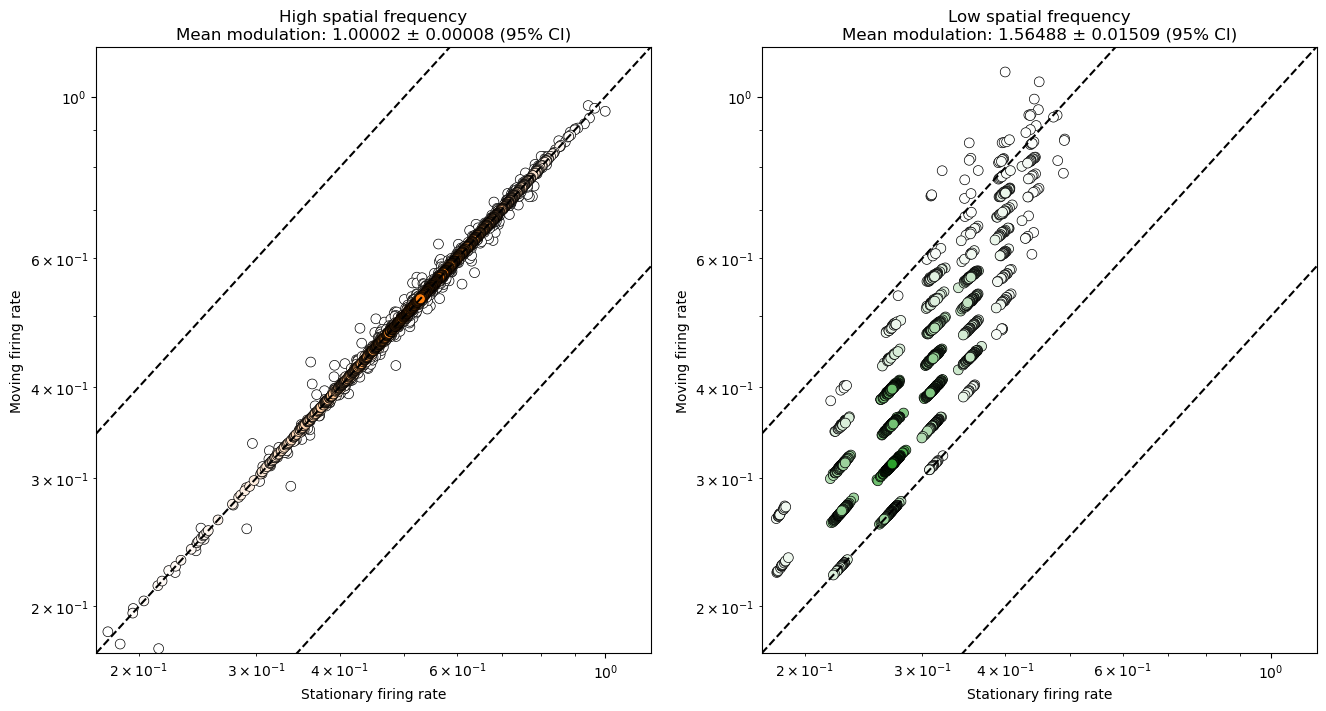

In [369]:
from scipy.stats import gaussian_kde

jitter_sigma = 0

cm = 1/2.54

fig = plt.figure(figsize=(40*cm, 20*cm))

# low_freq_norm = np.max([np.max(avg_stationary_firing_rates[:, :, low_spatial_freq_idx, :].flatten()), np.max(avg_moving_firing_rates[:, :, low_spatial_freq_idx, :].flatten())])

# subtract the minimum firing rate from the firing rates
low_freq_min_val = np.nanmin(np.concatenate((low_freq_stationary_firing_rates, low_freq_moving_firing_rates)))
normed_low_freq_stationary_firing_rates = low_freq_stationary_firing_rates - low_freq_min_val
normed_low_freq_moving_firing_rates = low_freq_moving_firing_rates - low_freq_min_val

low_freq_norm = np.max(np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates)))

normed_low_freq_stationary_firing_rates = low_freq_stationary_firing_rates/low_freq_norm
normed_low_freq_moving_firing_rates = low_freq_moving_firing_rates/low_freq_norm

normed_low_freq_stationary_firing_rates *= 0.9
normed_low_freq_moving_firing_rates *= 0.9
normed_low_freq_stationary_firing_rates += 0.1
normed_low_freq_moving_firing_rates += 0.1

xy = np.vstack([normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates])
z = gaussian_kde(xy)(xy)
normed_low_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_stationary_firing_rates))
normed_low_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_low_freq_moving_firing_rates))


# low_freq_staitonary_sorted = np.argsort(normed_low_freq_stationary_firing_rates.flatten())
low_freq_moving_sorted_idx = np.argsort(z)

low_freq_stationary_sorted = normed_low_freq_stationary_firing_rates[low_freq_moving_sorted_idx]
low_freq_moving_sorted = normed_low_freq_moving_firing_rates[low_freq_moving_sorted_idx]
z = z[low_freq_moving_sorted_idx]

ax = fig.add_subplot(1, 2, 2)
density = ax.scatter(low_freq_stationary_sorted, low_freq_moving_sorted, s=50, edgecolors='#000000', linewidths=0.5, c=z, cmap=white_to_green)

# add a colorbar for the density plot
# colorbar(density)

# subtract the minimum firing rate from the firing rates
high_freq_min_val = np.nanmin(np.concatenate((high_freq_stationary_firing_rates, high_freq_moving_firing_rates)))
normed_high_freq_stationary_firing_rates = high_freq_stationary_firing_rates - high_freq_min_val
normed_high_freq_moving_firing_rates = high_freq_moving_firing_rates - high_freq_min_val

high_freq_norm = np.max(np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates)))

normed_high_freq_stationary_firing_rates = normed_high_freq_stationary_firing_rates/high_freq_norm
normed_high_freq_moving_firing_rates = normed_high_freq_moving_firing_rates/high_freq_norm

normed_high_freq_stationary_firing_rates *= 0.9
normed_high_freq_moving_firing_rates *= 0.9
normed_high_freq_stationary_firing_rates += 0.1
normed_high_freq_moving_firing_rates += 0.1

xy = np.vstack([normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten()])
z = gaussian_kde(xy)(xy)
normed_high_freq_stationary_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_stationary_firing_rates))
normed_high_freq_moving_firing_rates += np.random.normal(0, jitter_sigma, len(normed_high_freq_moving_firing_rates))


high_freq_moving_sorted_idx = np.argsort(z)
high_freq_stationary_sorted = normed_high_freq_stationary_firing_rates[high_freq_moving_sorted_idx]
high_freq_moving_sorted = normed_high_freq_moving_firing_rates[high_freq_moving_sorted_idx]
z = z[high_freq_moving_sorted_idx]

ax2 = fig.add_subplot(1, 2, 1)
# density2 = ax2.scatter(normed_high_freq_stationary_firing_rates.flatten(), normed_high_freq_moving_firing_rates.flatten(), s=50, edgecolors='#999999', linewidths=0.5, c=z, cmap=black_to_orange)
density2 = ax2.scatter(high_freq_stationary_sorted, high_freq_moving_sorted, s=50, c=z, edgecolors='#000000', cmap=white_to_orange, linewidths=0.5)

# add a colorbar for the density plot
# colorbar(density2)

# compute the confidence intervals
low_modulation = low_freq_moving_firing_rates / low_freq_stationary_firing_rates
high_modulation = high_freq_moving_firing_rates / high_freq_stationary_firing_rates

low_mean = np.nanmean(low_modulation)
low_sem = np.nanstd(low_modulation) / np.sqrt(np.sum(~np.isnan(low_modulation)))
low_ci = 1.96 * low_sem

high_mean = np.nanmean(high_modulation)
high_sem = np.nanstd(high_modulation) / np.sqrt(np.sum(~np.isnan(high_modulation)))
high_ci = 1.96 * high_sem

ax.set_xlabel('Stationary firing rate')
ax.set_ylabel('Moving firing rate')
ax.set_title(f'Low spatial frequency\nMean modulation: {low_mean:.5f} ± {low_ci:.5f} (95% CI)')
ax2.set_xlabel('Stationary firing rate')
ax2.set_ylabel('Moving firing rate')
ax2.set_title(f'High spatial frequency\nMean modulation: {high_mean:.5f} ± {high_ci:.5f} (95% CI)')

ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
# find the min and max y and x values
min_x = ax.get_xlim()[0]
max_x = ax.get_xlim()[1]
min_y = ax.get_ylim()[0]
max_y = ax.get_ylim()[1]
min_both = min(min_x, min_y)
max_both = max(max_x, max_y)
print(min_both, max_both)
ax.set_ylim(min_both, max_both)
ax.set_xlim(min_both, max_both)
ax2.set_ylim(min_both, max_both)
ax2.set_xlim(min_both, max_both)
# min_x2 = ax2.get_xlim()[0]
# max_x2 = ax2.get_xlim()[1]
# min_y2 = ax2.get_ylim()[0]
# max_y2 = ax2.get_ylim()[1]
# min_both2 = min(min_x2, min_y2)
# max_both2 = max(max_x2, max_y2)
# min_both2 = .7
# max_both2 = 1
# ax2.set_ylim(min_both2, max_both2)
# ax2.set_xlim(min_both2, max_both2)

line = np.linspace(min_both, max_both, 100)
# line = np.linspace(min_both, max_both, 100)
ax.plot(line, line, color='k', linestyle='--')
ax.plot(line, 2*line, color='k', linestyle='--')
ax.plot(line, line/2, color='k', linestyle='--')
ax2.plot(line, line, color='k', linestyle='--')
ax2.plot(line, 2*line, color='k', linestyle='--')
ax2.plot(line, line/2, color='k', linestyle='--')

# plt.savefig('../cosyne_2025_figures/marm_fovela_peripheral_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../manuscript_figures/fig5_marm_foveal_peripheral_comparison_firing_rate_scatter_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

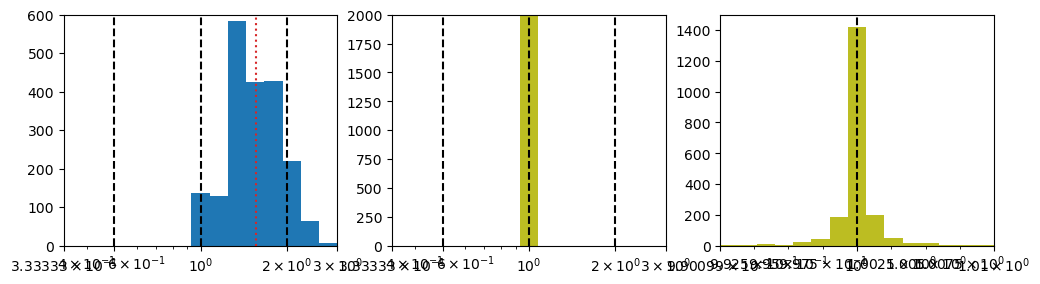

In [373]:
low_max = 3
high_max = 1.01

low_bins = np.logspace(np.log10(1/low_max), np.log10(low_max), 16)
high_bins = np.logspace(np.log10(1/high_max), np.log10(high_max), 16)

fig, ax = plt.subplots(1, 3, figsize=(12,3))

ax[0].hist(low_modulation, bins=low_bins, color='tab:blue')
ax[1].hist(high_modulation, bins=low_bins, color='tab:olive')
ax[2].hist(high_modulation, bins=high_bins, color='tab:olive')
ax[0].axvline(0.5, color='k', linestyle='--')
ax[0].axvline(1, color='k', linestyle='--')
ax[0].axvline(2, color='k', linestyle='--')
ax[1].axvline(0.5, color='k', linestyle='--')
ax[1].axvline(1, color='k', linestyle='--')
ax[1].axvline(2, color='k', linestyle='--')
ax[2].axvline(1, color='k', linestyle='--')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[0].set_xlim(1/low_max, low_max)
ax[1].set_xlim(1/low_max, low_max)
ax[2].set_xlim(1/high_max, high_max)
ax[0].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[1].set_xticks([1/low_max, 0.5, 1, 2, low_max])
ax[2].set_xticks([1/high_max, 1, high_max])
# plot the mean as a line
ax[0].axvline(np.nanmean(low_modulation), color='tab:red', linestyle=':')
ax[0].set_ylim(0, 600)
ax[1].set_ylim(0, 2000)
ax[2].set_ylim(0, 1500)
plt.savefig('../manuscript_figures/fig5_perif_marm_dist_fr_ratio.pdf', format='pdf', bbox_inches='tight')

## PCA

In [285]:
# PCA on the optimal L and optimal k parameters
low_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, low_spatial_freq_idx, :, :], moving_firing_rates[:, :, low_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*num_samples).T
# low_spatial_freq_design_mat = np.concatenate((stationary_firing_rates_low_freq, stationary_firing_rates_low_freq), axis=-1).reshape(-1, 2*num_samples).T
high_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, high_spatial_freq_idx, :, :], moving_firing_rates[:, :, high_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*num_samples).T
# low_spatial_freq_design_mat = np.concatenate((optimal_L_arr_stationary[:, :, low_spatial_freq_idx, :, lambda_idx].flatten(), optimal_L_arr_moving[:, :, low_spatial_freq_idx, :, lambda_idx].flatten()))
# print(low_spatial_freq_design_mat.shape)
# low_spatial_freq_design_mat = low_spatial_freq_design_mat[:, np.newaxis]
# low_spatial_freq_design_mat = np.concatenate((normed_low_freq_stationary_firing_rates, normed_low_freq_moving_firing_rates), axis=-1).reshape(-1, 2*num_samples).T
# high_spatial_freq_design_mat = np.concatenate((normed_high_freq_stationary_firing_rates, normed_high_freq_moving_firing_rates), axis=-1).reshape(-1, 2*num_samples).T

# normalize
low_spatial_freq_design_mat /= np.mean(low_spatial_freq_design_mat, axis=0, keepdims=True)
high_spatial_freq_design_mat /= np.mean(high_spatial_freq_design_mat, axis=0, keepdims=True)
# low_spatial_freq_design_mat = (low_spatial_freq_design_mat-np.mean(low_spatial_freq_design_mat, axis=0, keepdims=True))/np.std(low_spatial_freq_design_mat, axis=0, keepdims=True)
# high_spatial_freq_design_mat = (high_spatial_freq_design_mat-np.mean(high_spatial_freq_design_mat, axis=0, keepdims=True))/np.std(high_spatial_freq_design_mat, axis=0, keepdims=True)

In [ ]:
from sklearn.decomposition import PCA

low_spatial_freq_pca = PCA(n_components=1)
low_spatial_freq_pca.fit(low_spatial_freq_design_mat)

high_spatial_freq_pca = PCA(n_components=1)
high_spatial_freq_pca.fit(high_spatial_freq_design_mat)

# fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# ax[0].plot(np.cumsum(low_spatial_freq_pca.explained_variance_ratio_))
# ax[0].set_xlabel('Principal component')
# ax[0].set_ylabel('Explained variance ratio')
# # ax[0, 0].set_ylim(0, 1.1)
# # ax[0, 0].set_xlim(0, 10)
# ax[0].set_title('Explained variance ratio')
# ax[1].plot(np.cumsum(high_spatial_freq_pca.explained_variance_ratio_))
# ax[1].set_xlabel('Principal component')
# ax[1].set_ylabel('Explained variance ratio')
# # ax[0, 1].set_ylim(0, 1.1)
# # ax[0, 1].set_xlim(0, 10)
# ax[1].set_title('Explained variance ratio')

In [ ]:
plt.bar(1, low_spatial_freq_pca.explained_variance_ratio_[0]*100, color='tab:orange', width=0.5)
plt.bar(2, high_spatial_freq_pca.explained_variance_ratio_[0]*100, color='tab:blue', width=0.5)
plt.xlim(0,3)
plt.ylim(85,100)
plt.xticks([1, 2], ['Low spatial frequency', 'High spatial frequency'])
plt.ylabel('Variance explained by PC1 (%)')
# plt.savefig('../manuscript_figures/pca_variance_explained_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../cosyne_2025_figures/pca_variance_explained_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

In [ ]:
low_spatial_freq_scores = low_spatial_freq_pca.transform(low_spatial_freq_design_mat)
high_spatial_freq_scores = high_spatial_freq_pca.transform(high_spatial_freq_design_mat)

low_spatial_freq_scores/=np.std(low_spatial_freq_scores, axis=0, keepdims=True)
high_spatial_freq_scores/=np.std(high_spatial_freq_scores, axis=0, keepdims=True)

# scores = pca.transform(design_mat)
n_draws = num_samples


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

n_draws = num_samples

ax[0, 0].scatter(low_spatial_freq_scores[:n_draws, 0], low_spatial_freq_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[0, 0].scatter(low_spatial_freq_scores[n_draws:, 0], low_spatial_freq_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[0, 0].set_xlabel('PC1 scores')
ax[0, 0].set_ylabel('PC2 scores')
ax[0, 0].legend()
ax[1, 0].scatter(low_spatial_freq_scores[:n_draws, 1], low_spatial_freq_scores[:n_draws, 2], label='Stationary', alpha=0.5, color='tab:red')
ax[1, 0].scatter(low_spatial_freq_scores[n_draws:, 1], low_spatial_freq_scores[n_draws:, 2], label='Moving', alpha=0.5, color='tab:blue')
ax[1, 0].set_xlabel('PC2 scores')
ax[1, 0].set_ylabel('PC3 scores')
ax[1, 0].legend()
ax[0, 0].set_title('Low spatial frequency')
ax[0, 1].set_title('High spatial frequency')

ax[0, 1].scatter(high_spatial_freq_scores[:n_draws, 0], high_spatial_freq_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[0, 1].scatter(high_spatial_freq_scores[n_draws:, 0], high_spatial_freq_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[0, 1].set_xlabel('PC1 scores')
ax[0, 1].set_ylabel('PC2 scores')
ax[0, 1].legend()
ax[1, 1].scatter(high_spatial_freq_scores[:n_draws, 1], high_spatial_freq_scores[:n_draws, 2], label='Stationary', alpha=0.5, color='tab:red')
ax[1, 1].scatter(high_spatial_freq_scores[n_draws:, 1], high_spatial_freq_scores[n_draws:, 2], label='Moving', alpha=0.5, color='tab:blue')
ax[1, 1].set_xlabel('PC2 scores')
ax[1, 1].set_ylabel('PC3 scores')
ax[1, 1].legend()

# ax[0, 2].scatter(scores[:n_draws, 0], scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
# ax[0, 2].scatter(scores[n_draws:, 0], scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
# ax[0, 2].set_xlabel('PC1 scores')
# ax[0, 2].set_ylabel('PC2 scores')
# ax[0, 2].legend()
# ax[1, 2].scatter(scores[:n_draws, 1], scores[:n_draws, 2], label='Stationary', alpha=0.5, color='tab:red')
# ax[1, 2].scatter(scores[n_draws:, 1], scores[n_draws:, 2], label='Moving', alpha=0.5, color='tab:blue')
# ax[1, 2].set_xlabel('PC2 scores')
# ax[1, 2].set_ylabel('PC3 scores')
# ax[1, 2].legend()

In [ ]:
# plot a histogram of the scores for the stationary and moving scenarios
fig, ax = plt.subplots(1, 3, figsize=(12*1.25, 3*1.25))

# bins = np.linspace(-25, 25, 100)

# ax[0].hist(low_spatial_freq_scores[:n_draws, 0]/np.std(low_spatial_freq_scores[:n_draws, 0]), weights=np.ones_like(low_spatial_freq_scores[:n_draws, 0])/len(low_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red', density=True)
# ax[0].hist(low_spatial_freq_scores[n_draws:, 0]/np.std(low_spatial_freq_scores[n_draws:, 0]), weights=np.ones_like(low_spatial_freq_scores[n_draws:, 0])/len(low_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue', density=True)
ax[0].hist(low_spatial_freq_scores[:n_draws, 0], weights=np.ones_like(low_spatial_freq_scores[:n_draws, 0])/len(low_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red', density=True)
ax[0].hist(low_spatial_freq_scores[n_draws:, 0], weights=np.ones_like(low_spatial_freq_scores[n_draws:, 0])/len(low_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue', density=True)
ax[0].set_xlabel('PC1 Score')
ax[0].set_ylabel('Probability')
ax[0].set_title('Low spatial frequency')
ax[0].legend()

# bins = np.linspace(-2, 2, 100)

ax[1].hist(high_spatial_freq_scores[:n_draws, 0], weights=np.ones_like(high_spatial_freq_scores[:n_draws, 0])/len(high_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red')
ax[1].hist(high_spatial_freq_scores[n_draws:, 0], weights=np.ones_like(high_spatial_freq_scores[n_draws:, 0])/len(high_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue')
# ax[1].hist(high_spatial_freq_scores[:n_draws, 0]/np.std(high_spatial_freq_scores[:n_draws, 0]), weights=np.ones_like(high_spatial_freq_scores[:n_draws, 0])/len(high_spatial_freq_scores[:n_draws, 0]), bins=100, alpha=0.5, label='Stationary', color='tab:red')
# ax[1].hist(high_spatial_freq_scores[n_draws:, 0]/np.std(high_spatial_freq_scores[n_draws:, 0]), weights=np.ones_like(high_spatial_freq_scores[n_draws:, 0])/len(high_spatial_freq_scores[n_draws:, 0]), bins=100, alpha=0.5, label='Moving', color='tab:blue')
ax[1].set_xlabel('PC1 Score')
# ax[1].set_ylabel('Probability')
ax[1].set_title('High spatial frequency')
ax[1].legend()

# bins = np.linspace(-25, 25, 100)
# ax[2].hist(scores[:n_draws, 0], weights=np.ones_like(scores[:n_draws, 0])/len(scores[:n_draws, 0]), bins=bins, alpha=0.5, label='Stationary', color='tab:red')
# ax[2].hist(scores[n_draws:, 0], weights=np.ones_like(scores[n_draws:, 0])/len(scores[n_draws:, 0]), bins=bins, alpha=0.5, label='Moving', color='tab:blue')
# ax[2].set_xlabel('PC1 Score')
# ax[2].set_ylabel('Probability')
# ax[2].set_title('All spatial frequencies')
# ax[2].legend()

ax[2].scatter(1, np.mean(low_spatial_freq_scores[n_draws:, 0])-np.mean(low_spatial_freq_scores[:n_draws, 0]), color='tab:orange',s=50)
ax[2].scatter(2, np.mean(high_spatial_freq_scores[n_draws:, 0])-np.mean(high_spatial_freq_scores[:n_draws, 0]), color='tab:blue', s=50)
ax[2].errorbar(1, np.mean(low_spatial_freq_scores[n_draws:, 0])-np.mean(low_spatial_freq_scores[:n_draws, 0]), yerr=3*np.std(low_spatial_freq_scores[n_draws:, 0]-low_spatial_freq_scores[:n_draws, 0]), color='tab:orange', linewidth=2)
ax[2].errorbar(2, np.mean(high_spatial_freq_scores[n_draws:, 0])-np.mean(high_spatial_freq_scores[:n_draws, 0]), yerr=3*np.std(high_spatial_freq_scores[n_draws:, 0]-high_spatial_freq_scores[:n_draws, 0]), color='tab:blue', linewidth=2)
ax[2].set_xticks([1, 2], labels=['Low', 'High'])
ax[2].set_ylabel('Difference in PC1 score')
ax[2].set_xlim(0, 3)
ax[2].set_ylim(-1, 3)
ax[2].hlines(0, 0, 3, linestyle='--', color='k', alpha=0.25)
plt.savefig('../manuscript_figures/pca_scores_histogram_window_length_' + str(window_length) + '.pdf', format='pdf', bbox_inches='tight')

# a) low dimensional structure
# b) more directly linked to locomotion state for low frequencies, than for high frequencies

## NMF

In [ ]:
# present each nonlinearity a test stimulus and compute the firing rate to the this stimulus. Normalize all responses by a reference firing rate determined by a reference nonlinearity which is the average over the parameters for the low and high spatial frequencies

avg_k_low_spatial_freq = np.mean(np.concatenate((optimal_k_arr_stationary, optimal_k_arr_moving), axis=-1)[:, :, low_spatial_freq_idx, :, lambda_idx, :])

avg_L_low_spatial_freq = np.mean(np.concatenate((optimal_L_arr_stationary, optimal_L_arr_moving), axis=-1)[:, :, low_spatial_freq_idx, :, lambda_idx, :])

avg_k_high_spatial_freq = np.mean(np.concatenate((optimal_k_arr_stationary, optimal_k_arr_moving), axis=-1)[:, :, high_spatial_freq_idx, :, lambda_idx, :])

avg_L_high_spatial_freq = np.mean(np.concatenate((optimal_L_arr_stationary, optimal_L_arr_moving), axis=-1)[:, :, high_spatial_freq_idx, :, lambda_idx, :])

In [ ]:
avg_L_low_spatial_freq

In [ ]:
# plot the reference nonlinearities

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

stim_range = np.linspace(-5, 5, 1000)

test_stim_val = 0.5

ax.plot(stim_range, logistic_func(stim_range, k=avg_k_low_spatial_freq, L=avg_L_low_spatial_freq), label='Low spatial frequency', color='tab:orange')
ax.plot(stim_range, logistic_func(stim_range, k=avg_k_high_spatial_freq, L=avg_L_high_spatial_freq), label='High spatial frequency', color='tab:blue')
ax.vlines(test_stim_val, 0, 2, linestyle='--', color='k')

r_ref_low = logistic_func(test_stim_val, k=avg_k_low_spatial_freq, L=avg_L_low_spatial_freq)
r_ref_high = logistic_func(test_stim_val, k=avg_k_high_spatial_freq, L=avg_L_high_spatial_freq)

In [ ]:
# compute the firing rate for the optimal parameters

norm_moving_firing_rates_low = np.zeros((len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), n_draws))
norm_stationary_firing_rates_low = np.zeros((len(orientation_arr), len(phase_arr), len(low_spatial_freq_idx), len(position_arr), n_draws))
norm_moving_firing_rates_high = np.zeros((len(orientation_arr), len(phase_arr), len(high_spatial_freq_idx), len(position_arr), n_draws))
norm_stationary_firing_rates_high = np.zeros((len(orientation_arr), len(phase_arr), len(high_spatial_freq_idx), len(position_arr), n_draws))

for i, orientation in tqdm(enumerate(orientation_arr)):
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(low_spatial_freq_idx):
            for m, position in enumerate(position_arr):
                for k in range(n_draws):
                    norm_moving_firing_rates_low[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_moving[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_moving[i, j, wavelength, m, lambda_idx, k])
                    norm_stationary_firing_rates_low[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_stationary[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_stationary[i, j, wavelength, m, lambda_idx, k])

for i, orientation in tqdm(enumerate(orientation_arr)):
    for j, phase in enumerate(phase_arr):
        for l, wavelength in enumerate(high_spatial_freq_idx):
            for m, position in enumerate(position_arr):
                for k in range(n_draws):
                    norm_moving_firing_rates_high[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_moving[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_moving[i, j, wavelength, m, lambda_idx, k])
                    norm_stationary_firing_rates_high[i, j, l, m, k] = logistic_func(test_stim_val, k=optimal_k_arr_stationary[i, j, wavelength, m, lambda_idx, k], L=optimal_L_arr_stationary[i, j, wavelength, m, lambda_idx, k])

In [ ]:
# normalize the responses

norm_moving_firing_rates_low /= r_ref_low
norm_stationary_firing_rates_low /= r_ref_low

norm_moving_firing_rates_high /= r_ref_high
norm_stationary_firing_rates_high /= r_ref_high

In [ ]:
# save the responses
np.save('norm_moving_firing_rates_low_test_stim_' + str(test_stim_val), norm_moving_firing_rates_low)
np.save('norm_stationary_firing_rates_low_test_stim_' + str(test_stim_val), norm_stationary_firing_rates_low)
np.save('norm_moving_firing_rates_high_test_stim_' + str(test_stim_val), norm_moving_firing_rates_high)
np.save('norm_stationary_firing_rates_high_test_stim_' + str(test_stim_val), norm_stationary_firing_rates_high)

In [ ]:
# load the responses
test_stim_val = 0
norm_moving_firing_rates_low = np.load('norm_moving_firing_rates_low_test_stim_' + str(test_stim_val) + '.npy')
norm_stationary_firing_rates_low = np.load('norm_stationary_firing_rates_low_test_stim_' + str(test_stim_val) + '.npy')
norm_moving_firing_rates_high = np.load('norm_moving_firing_rates_high_test_stim_' + str(test_stim_val) + '.npy')
norm_stationary_firing_rates_high = np.load('norm_stationary_firing_rates_high_test_stim_' + str(test_stim_val) + '.npy')

In [ ]:
bins = np.linspace(0, 5, 100)

plt.hist(norm_moving_firing_rates_low.flatten(), bins=bins, alpha=0.5, label='Moving', color='tab:blue', density=True)
plt.hist(norm_stationary_firing_rates_low.flatten(), bins=bins, alpha=0.5, label='Stationary', color='tab:red', density=True)
plt.legend()
plt.hist(norm_moving_firing_rates_high.flatten(), bins=bins, alpha=0.5, label='Moving', color='tab:blue', density=True, hatch='//')
plt.hist(norm_stationary_firing_rates_high.flatten(), bins=bins, alpha=0.5, label='Stationary', color='tab:red', density=True, hatch='//')

In [ ]:
# low_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, low_spatial_freq_idx, :, :], moving_firing_rates[:, :, low_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*n_draws).T
# high_spatial_freq_design_mat = np.concatenate((stationary_firing_rates[:, :, high_spatial_freq_idx, :, :], moving_firing_rates[:, :, high_spatial_freq_idx, :, :]), axis=-1).reshape(-1, 2*n_draws).T

# design_mat = np.concatenate((low_spatial_freq_design_mat, high_spatial_freq_design_mat), axis=1)
# low_spatial_freq_design_mat = np.concatenate((optimal_L_arr_stationary[:, :, low_spatial_freq_idx, :, lambda_idx, :], optimal_L_arr_moving[:, :, low_spatial_freq_idx, :, lambda_idx, :]), axis=-1).reshape(-1, 2*n_draws).T
# high_spatial_freq_design_mat = np.concatenate((optimal_L_arr_stationary[:, :, high_spatial_freq_idx, :, lambda_idx, :], optimal_L_arr_moving[:, :, high_spatial_freq_idx, :, lambda_idx, :]), axis=-1).reshape(-1, 2*n_draws).T

# design_mat = np.concatenate((low_spatial_freq_design_mat, high_spatial_freq_design_mat), axis=1)

low_spatial_freq_design_mat = np.concatenate((norm_stationary_firing_rates_low, norm_moving_firing_rates_low), axis=-1).reshape(-1, 2*n_draws).T
high_spatial_freq_design_mat = np.concatenate((norm_stationary_firing_rates_high, norm_moving_firing_rates_high), axis=-1).reshape(-1, 2*n_draws).T


In [ ]:
norm_stationary_firing_rates_low.shape

In [286]:
# run NMF on the optimal L and optimal k parameters

from sklearn.decomposition import NMF

low_spatial_freq_nmf = NMF(n_components=1)
low_spatial_freq_nmf.fit(low_spatial_freq_design_mat)

high_spatial_freq_nmf = NMF(n_components=1)
high_spatial_freq_nmf.fit(high_spatial_freq_design_mat)

design_mat = np.concatenate((low_spatial_freq_design_mat, high_spatial_freq_design_mat), axis=1)
nmf = NMF(n_components=1)
nmf.fit(design_mat)

/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=1)

In [287]:
low_spatial_freq_nmf_scores = low_spatial_freq_nmf.transform(low_spatial_freq_design_mat)
high_spatial_freq_nmf_scores = high_spatial_freq_nmf.transform(high_spatial_freq_design_mat)
nmf_scores = nmf.transform(design_mat)

In [288]:
# compute the variance explained by the NMF using scipy metrics
from sklearn.metrics import explained_variance_score
def get_score(model, data, scorer=explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

low_spatial_freq_nmf_score = get_score(low_spatial_freq_nmf, low_spatial_freq_design_mat)
high_spatial_freq_nmf_score = get_score(high_spatial_freq_nmf, high_spatial_freq_design_mat)

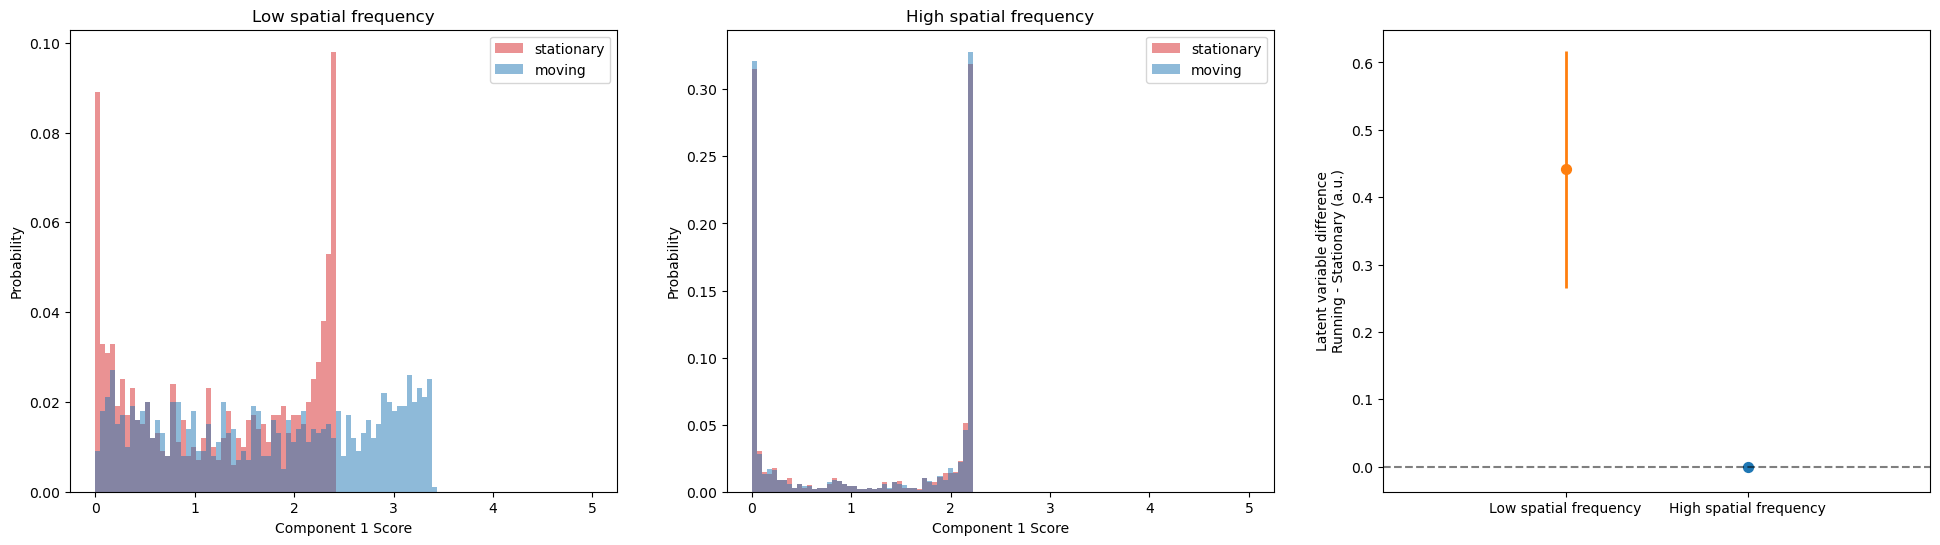

In [290]:
component_idx = 0

bins = np.linspace(0, 5, 100)
n_draws = num_samples

low_diff = low_spatial_freq_nmf_scores[n_draws:, component_idx] - low_spatial_freq_nmf_scores[:n_draws, component_idx]
high_diff = high_spatial_freq_nmf_scores[n_draws:, component_idx] - high_spatial_freq_nmf_scores[:n_draws, component_idx]

# low_diff /= np.std(low_spatial_freq_nmf_scores[:, component_idx])
# high_diff /= np.std(high_spatial_freq_nmf_scores[:, component_idx])

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].hist(low_spatial_freq_nmf_scores[:n_draws, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(low_spatial_freq_nmf_scores[:n_draws, component_idx])/len(low_spatial_freq_nmf_scores[:n_draws, component_idx]))
ax[0].hist(low_spatial_freq_nmf_scores[n_draws:, component_idx]/np.std(low_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(low_spatial_freq_nmf_scores[n_draws:, component_idx])/len(low_spatial_freq_nmf_scores[n_draws:, component_idx]))
ax[0].set_xlabel(f'Component {component_idx+1} Score')
ax[0].set_ylabel('Probability')
ax[0].set_title('Low spatial frequency')
ax[0].legend()
ax[1].hist(high_spatial_freq_nmf_scores[:n_draws, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='stationary', color='tab:red', weights=np.ones_like(high_spatial_freq_nmf_scores[:n_draws, component_idx])/len(high_spatial_freq_nmf_scores[:n_draws, component_idx]))
ax[1].hist(high_spatial_freq_nmf_scores[n_draws:, component_idx]/np.std(high_spatial_freq_nmf_scores[:, component_idx]), bins=bins, alpha=0.5, label='moving', color='tab:blue', weights=np.ones_like(high_spatial_freq_nmf_scores[:n_draws, component_idx])/len(high_spatial_freq_nmf_scores[:n_draws, component_idx]))
ax[1].set_xlabel(f'Component {component_idx+1} Score')
ax[1].set_ylabel('Probability')
ax[1].set_title('High spatial frequency')
ax[1].legend()

ax[2].scatter(1, np.mean(low_diff), color='tab:orange', label='Low spatial frequency', s=50)
ax[2].scatter(2, np.mean(high_diff), color='tab:blue', label='High spatial frequency', s=50)
ax[2].errorbar(1, np.mean(low_diff), yerr=np.std(low_diff), color='tab:orange', linewidth=2)
ax[2].errorbar(2, np.mean(high_diff), yerr=np.std(high_diff), color='tab:blue', linewidth=2)
ax[2].set_xticks([1, 2])
ax[2].set_xticklabels(['Low spatial frequency', 'High spatial frequency'])
ax[2].set_xlim(0, 3)
ax[2].hlines(0, 0, 3, color='k', linestyle='--', alpha=0.5)
ax[2].set_ylabel('Latent variable difference\nRunning - Stationary (a.u.)')
# plt.savefig('../cosyne_2025_figures/nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../manuscript_figures/fig5_nmf_scores_difference.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# transform the design matrix into the NMF space

low_spatial_freq_nmf_scores = low_spatial_freq_nmf.transform(low_spatial_freq_design_mat)
high_spatial_freq_nmf_scores = high_spatial_freq_nmf.transform(high_spatial_freq_design_mat)
nmf_scores = nmf.transform(design_mat)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(low_spatial_freq_nmf_scores[:n_draws, 0], low_spatial_freq_nmf_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[0].scatter(low_spatial_freq_nmf_scores[n_draws:, 0], low_spatial_freq_nmf_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[0].set_xlabel('NMF1 scores')
ax[0].set_ylabel('NMF2 scores')
ax[0].legend()
ax[0].set_title('Low spatial frequency')
ax[1].set_title('High spatial frequency')
ax[1].scatter(high_spatial_freq_nmf_scores[:n_draws, 0], high_spatial_freq_nmf_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[1].scatter(high_spatial_freq_nmf_scores[n_draws:, 0], high_spatial_freq_nmf_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[1].set_xlabel('NMF1 scores')
ax[1].set_ylabel('NMF2 scores')
ax[1].legend()
ax[2].scatter(nmf_scores[:n_draws, 0], nmf_scores[:n_draws, 1], label='Stationary', alpha=0.5, color='tab:red')
ax[2].scatter(nmf_scores[n_draws:, 0], nmf_scores[n_draws:, 1], label='Moving', alpha=0.5, color='tab:blue')
ax[2].set_xlabel('NMF1 scores')
ax[2].set_ylabel('NMF2 scores')
ax[2].legend()

## Non-Negative PCA

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np

# Install the required package if not already installed
utils = importr('utils')
robjects.r('''
if (!requireNamespace("nsprcomp", quietly = TRUE)) {
  install.packages("nsprcomp")
}
''')

# Load the nsprcomp package
nsprcomp = importr('nsprcomp')

# Define the Non-negative PCA function using nsprcomp
def non_negative_pca(data, n_components):
    """
    Perform Non-negative PCA using nsprcomp in R via rpy2.
    
    Parameters:
        data (numpy.ndarray): Non-negative input data.
        n_components (int): Number of components to extract.
    
    Returns:
        dict: Contains principal components and loadings as NumPy arrays.
    """
    # Ensure the input data is numeric
    print("Original Data Type in Python:", type(data))  # Check the type of the input
    print("Data Shape:", data.shape)  # Check the shape of the data
    
    # Convert the NumPy array to a list and pass it to R as a matrix
    r_data = robjects.r['matrix'](robjects.FloatVector(data.flatten()), nrow=data.shape[0], ncol=data.shape[1])
    print("Converted Data Type in R:", type(r_data))  # Check the type of the converted data in R
    
    # Check if the data is numeric in R
    is_numeric = robjects.r['is.numeric'](r_data)
    print("Is Data Numeric in R:", is_numeric)  # Debugging if R recognizes the data as numeric
    
    # Perform Non-negative PCA using nsprcomp
    pca_result = nsprcomp.nsprcomp(r_data, ncomp=n_components, nneg=True, scale=True)
    
    # Extract principal components and loadings
    principal_components = pca_result.rx2('x')  # Scores (projected data)
    loadings = pca_result.rx2('rotation')      # Loadings (principal axes)
    
    # Convert the R matrices to Python objects (NumPy arrays)
    principal_components_array = np.array(principal_components)
    loadings_array = np.array(loadings)
    
    return {
        'principal_components': principal_components_array,
        'loadings': loadings_array
    }

# Example usage
if __name__ == "__main__":
    # Create a non-negative data matrix
    np.random.seed(123)
    data_matrix = np.random.normal(0, 1, (2, 20))  # 10x10 matrix of non-negative random values
    # structured as number of feature x number of samples
    print(np.shape(data_matrix))
    
    # Perform Non-negative PCA with 2 components
    result = non_negative_pca(data_matrix, n_components=10)
    
    # Print the results
    print("Principal Components:")
    print(result['principal_components'])
    
    print("Loadings:")
    print(result['loadings'])
